# MNIST with Classic Machine Learning

In this project we explore the MNIST dataset, containing over 5,000 instances of handwritten digits, with the final goal of developing an effective classification model. In order to do so, we will train and evaluate multiple classifiers as well as implement different techniques such as PCA or data augmentation to improve the performance of those classifiers.

We will start by importing the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Install the `ucimlrepo` library, so that we can use it later to access the dataset.

In [2]:
!pip install ucimlrepo


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## Dataset Description / Data Exploration
32x32 bitmaps (binary images) are divided into non-overlapping blocks of 4x4. The amount of pixels on each block is counted (at max 16) and the results is the new pixels value.

We end up with an 8x8 image, where each pixel is an integer between 0 and 16. No missing values on the dataset.
$$
32 / 4 = 8
$$


The dataset can be directly downloaded using the `ucimlrepo` package (installed above). We directly load the pandas dataframes into two variables (`X` and `y`). During this project we are not going to use any other type of external data, just this dataset.

We can start by getting some basic information about the dataset, for example for verifying the number of features and checking for any missing values.

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = digits.data.features
y = digits.data.targets

# variable information
print(digits.variables)

           name     role         type demographic description units  \
0    Attribute1  Feature      Integer        None        None  None   
1    Attribute2  Feature      Integer        None        None  None   
2    Attribute3  Feature      Integer        None        None  None   
3    Attribute4  Feature      Integer        None        None  None   
4    Attribute5  Feature      Integer        None        None  None   
..          ...      ...          ...         ...         ...   ...   
60  Attribute61  Feature      Integer        None        None  None   
61  Attribute62  Feature      Integer        None        None  None   
62  Attribute63  Feature      Integer        None        None  None   
63  Attribute64  Feature      Integer        None        None  None   
64        class   Target  Categorical        None        None  None   

   missing_values  
0              no  
1              no  
2              no  
3              no  
4              no  
..            ...  
60     

Here we can see that, the dataset has 64 integer features and 1 categorical target (class) with no missing values. Where the features represent numeric data, specifically, pixel intensities.

Moreover, the dataframes do not include any missing_values on any feature. The images are directly provided. There is no need to clean the data or fill in any missing values.

In [4]:
y.head(10)

,class
0,0
1,0
2,7
3,4
4,6
5,2
6,5
7,5
8,0
9,8


These are the class labels for the first 10 instances in the dataset. Now we will see the features for these 10 instances:

In [5]:
X.head(10)
#intensity of each pixel

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,0,6,14,7,1,0,0
1,0,0,10,16,6,0,0,0,0,7,...,3,0,0,0,10,16,15,3,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,0,9,14,0,0,0,0
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,0,1,15,2,0,0
4,0,0,5,14,4,0,0,0,0,0,...,12,0,0,0,4,12,14,7,0,0
5,0,0,11,16,10,1,0,0,0,4,...,8,3,0,0,10,16,16,16,16,6
6,0,0,1,11,13,11,7,0,0,0,...,0,0,0,0,1,13,5,0,0,0
7,0,0,8,10,8,7,2,0,0,1,...,0,0,0,0,4,13,8,0,0,0
8,0,0,15,2,14,13,2,0,0,0,...,0,0,0,0,10,12,5,0,0,0
9,0,0,3,13,13,2,0,0,0,6,...,12,0,0,0,3,15,11,6,0,0


In [6]:
X.describe()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60,Attribute61,Attribute62,Attribute63,Attribute64
count,5620.0,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,...,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000,5620.000000
mean,0.0,0.302135,5.393238,11.815480,11.578292,5.593772,1.379359,0.138256,0.003203,1.971174,...,3.737900,0.166904,0.000356,0.281851,5.760498,11.989680,11.572420,6.720819,2.093594,0.254093
std,0.0,0.879962,4.672719,4.255952,4.462546,5.631149,3.356633,1.046998,0.090423,3.098815,...,4.906909,0.843455,0.018863,0.929969,5.021145,4.347542,4.975675,5.815564,4.047959,1.418558
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,16.000000,...,16.000000,13.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


As expected, each instance has 64 features, each one corresponding to the intensity of a given pixel. We can directly see that there are some features (e.g. Attribute 1) that are 0 in every instance on the dataset. We will further explore this later.

We can select any image from the dataset and display it in an 8x8 image:

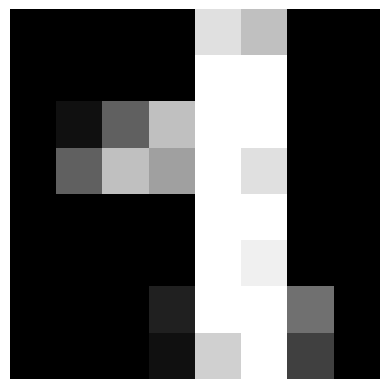

In [7]:
plt.imshow(X.values[567].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

In order to simplify the visualization we can make an iterator that expects a `pd.DataFrame`:

In [8]:
def image_iterator(X: pd.DataFrame, label=None, head=None):
    limit = head if head is not None else len(X)

    for i in range(limit):
        image = X.values[i].reshape(8, 8)
        if label is not None:
            yield image, label.values[i]
        else:
            yield image, None

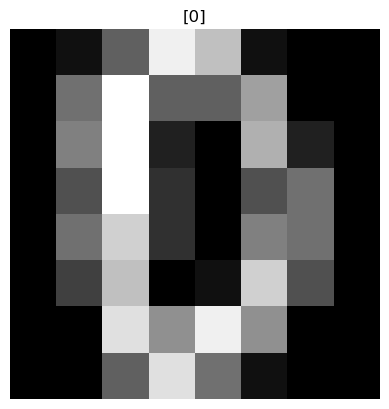

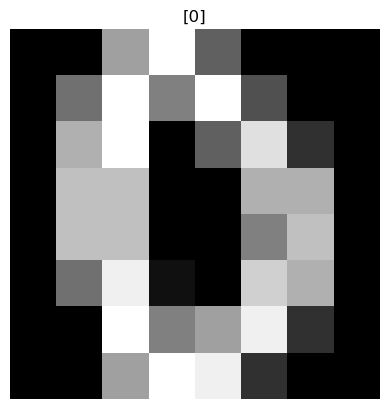

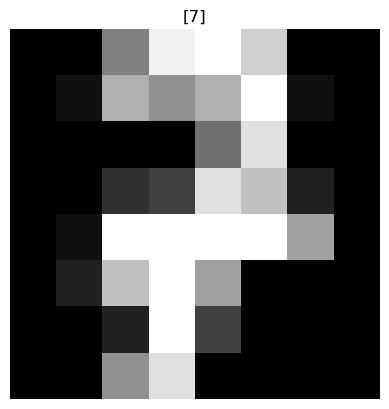

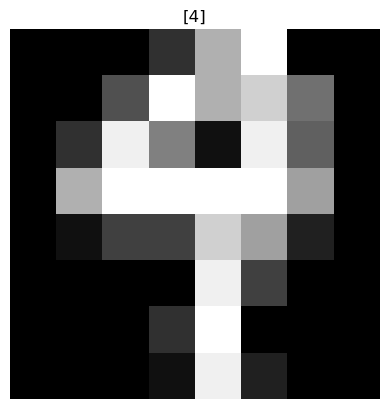

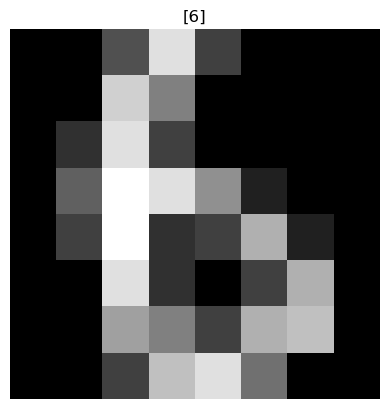

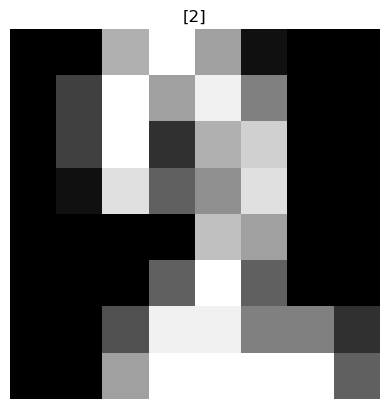

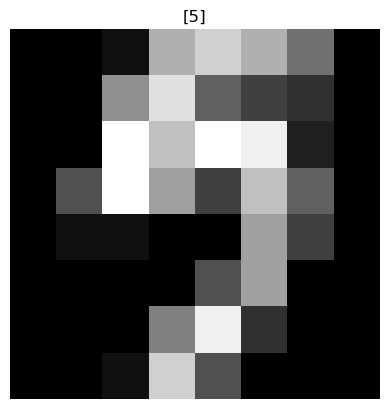

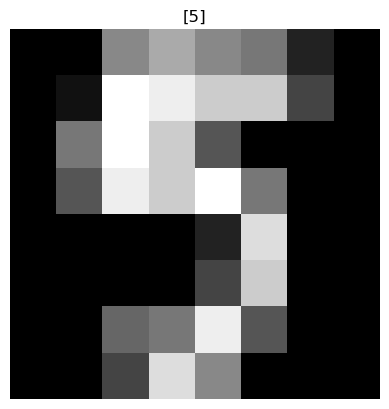

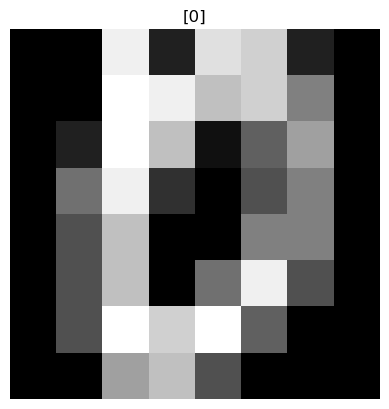

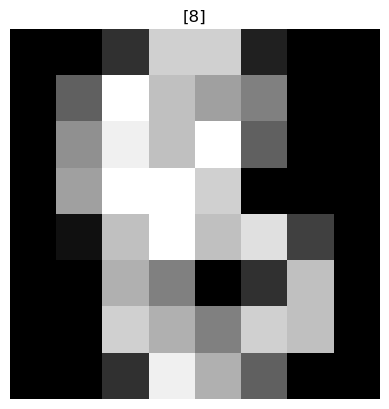

In [9]:
for image, label in image_iterator(X, y, head=10):
    plt.imshow(image, cmap='gray')
    plt.title(label)
    plt.axis('off')
    plt.show()

### Overall Dataset Exploration

Now we will plot the distribution of classes in our dataset to verify that we have a well distributed set of classes:

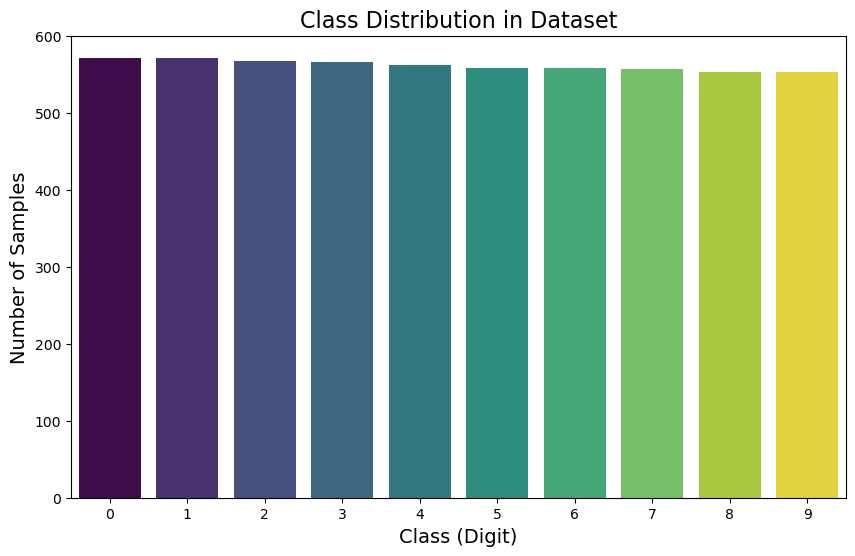

In [10]:
class_counts = y.value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=np.arange(len(class_counts)), y=class_counts, hue=np.arange(len(class_counts)), palette='viridis', legend=False)

# Set labels and title
plt.xlabel('Class (Digit)', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.title('Class Distribution in Dataset', fontsize=16)

# Show the plot
plt.show()

All classes are equally distributed in our dataset which is a really good sign. Otherwise, the data (in theory) will not be representative enough of the space of all the handwritten digits, and the model probably will have worst performance on the missrepresented classes.

To further explore we can see the mean between all of the images:

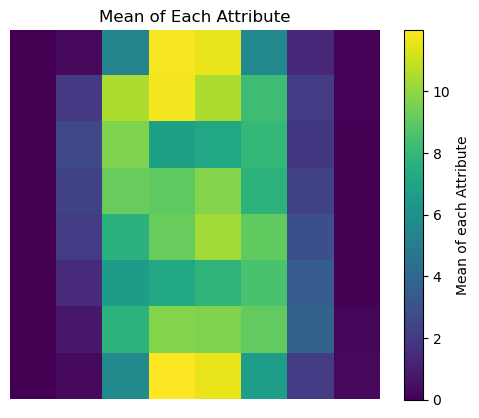

In [11]:
means = X.mean()
mean_matrix = means.values.reshape(8, 8)

plt.imshow(mean_matrix)
plt.title('Mean of Each Attribute')
plt.axis('off')
plt.colorbar(label='Mean of each Attribute')
plt.show()

We can distinguish a five drawn on the mean. Morever we see that some pixels are barely, for example on the left and right most columns of pixels, the vertical edges on each side. 
This implies that some dimensionaly reduction can be done on the dataset, since there is a clear diference between the importance of some pixels.

We can further verify this by seeing the max values that each pixel between all of the images in the dataset:

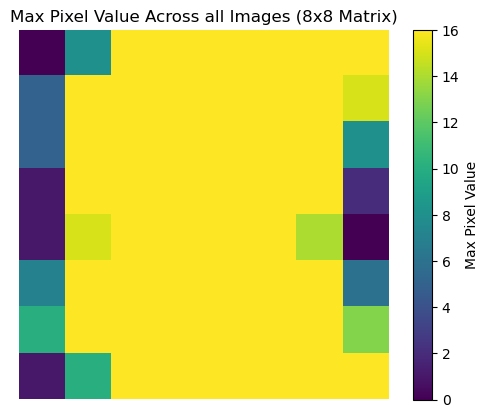

In [12]:
max_values = X.max()

max_matrix = max_values.values.reshape(8, 8)

plt.imshow(max_matrix)
plt.colorbar(label='Max Pixel Value')  # Add a colorbar with a label
plt.title('Max Pixel Value Across all Images (8x8 Matrix)')
plt.axis('off') # Hide the axis ticks and labels
plt.show()

There are exactly two pixels that between all of the images, they have a value of zero. The vertical left edge does not hold as much information has the right one. Moreover, that there are some instances on the right edge were the pixel value is 16 or 15, the highest possible values.

Exploring which pixels hold true some equalities we can explore further:

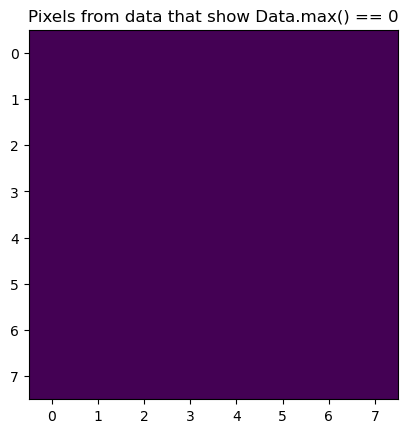

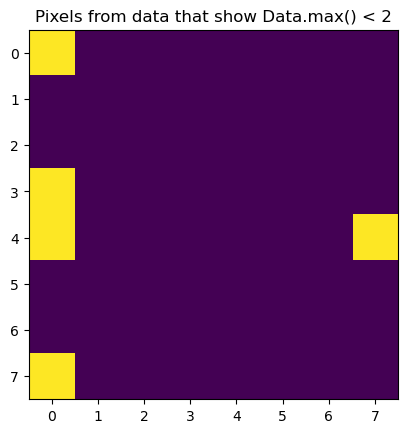

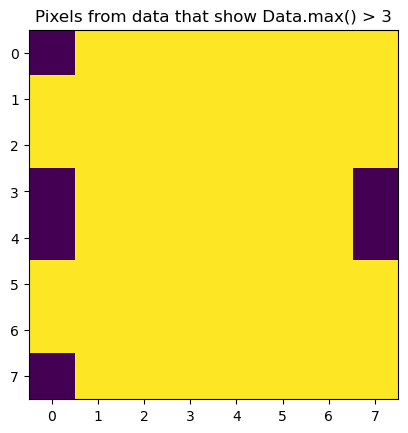

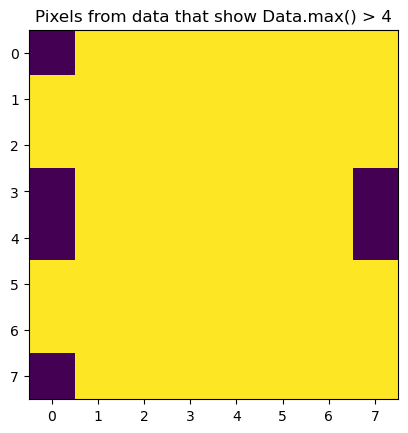

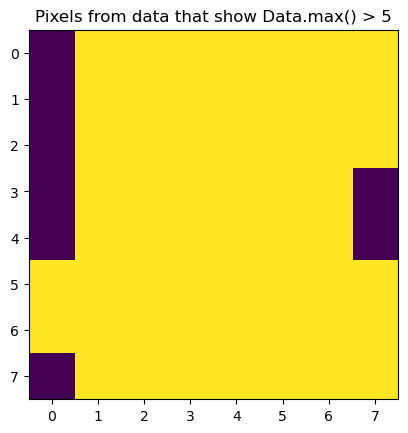

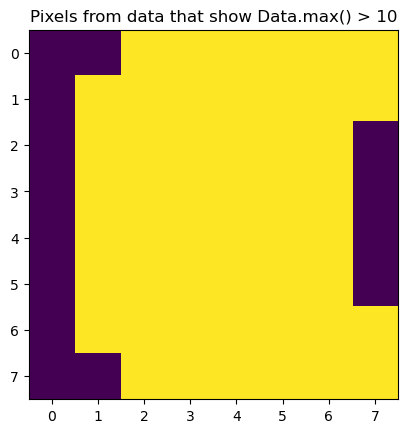

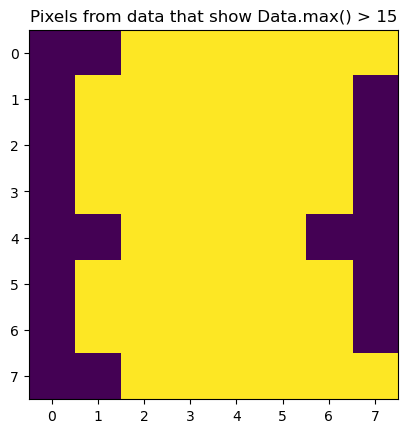

In [13]:
def get_stat_df(data: pd.DataFrame, condition, str_condition):
    zero_max_attributes = data.columns[condition]

    coord_zero_max_attributes = []
    matrix_zero_max_attributes = np.zeros((8, 8))

    for attribute in zero_max_attributes:

        num_attr = int(attribute[9:])
        coord_x = (num_attr - 1) % 8
        coord_y = (num_attr - 1) // 8

        matrix_zero_max_attributes[coord_y][coord_x] = 1

    plt.title(f'Pixels from data that show {str_condition}')
    plt.imshow(matrix_zero_max_attributes)
    plt.show()

get_stat_df(X, X.min() == 0, 'Data.max() == 0')
get_stat_df(X, X.max() < 2, 'Data.max() < 2')
get_stat_df(X, X.max() > 3, 'Data.max() > 3')
get_stat_df(X, X.max() > 4, 'Data.max() > 4')
get_stat_df(X, X.max() > 5, 'Data.max() > 5')
get_stat_df(X, X.max() > 10, 'Data.max() > 10')
get_stat_df(X, X.max() > 15, 'Data.max() > 15')

For example we know that all of the pixels have a minimum value of 0.

Description of the function used above:
> Binary matrix (get_staff_df), the matrix matrix_zero_max_attributes contains only values 0 or 1.
>
> 0 represents pixels that do not meet the specified condition.
>
> 1 represents pixels that do meet the condition.

### Dataset Exploration by Classes

Now we are going to explore the dataset by looking at each individual class. We want to see if they can be easily distinguish.

First we can see the mean of the images by each class, this will give us an overall picture of the dataset:

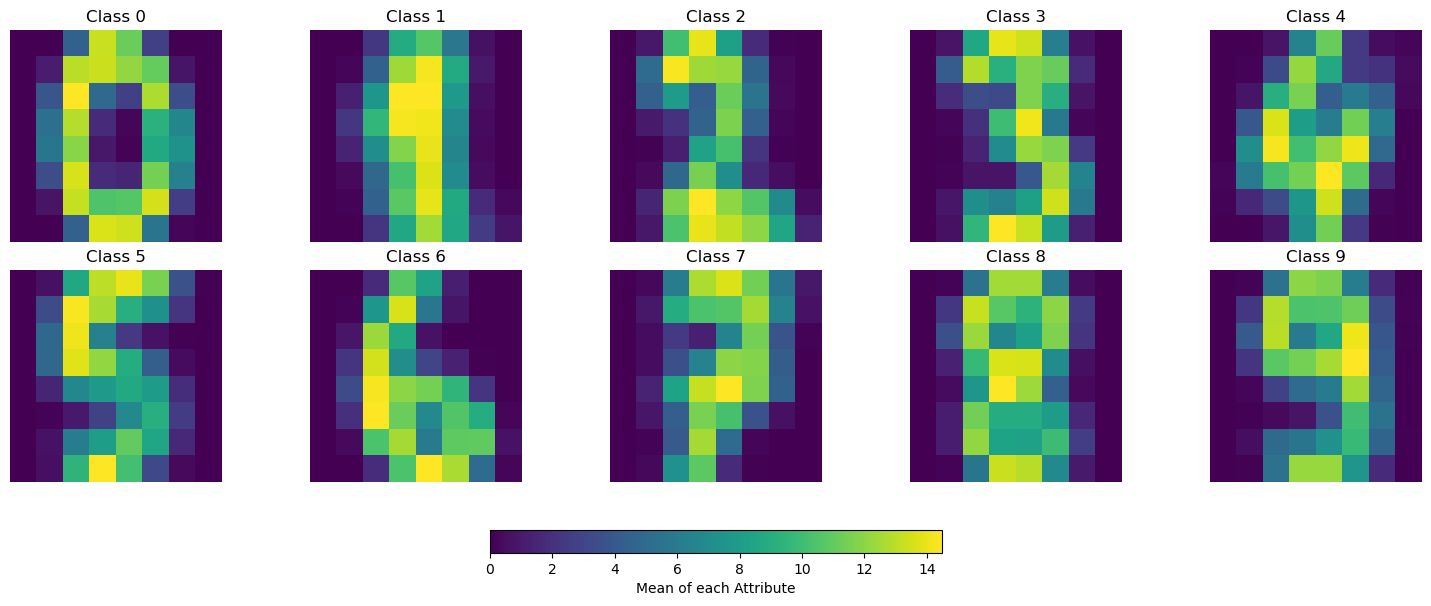

In [14]:
n_classes = 10

rows, cols = 2, 5

fig, axes = plt.subplots(rows, cols, figsize=(15, 6), constrained_layout=True)

for specific_class in range(n_classes):
    row, col = divmod(specific_class, cols)
    ax = axes[row, col]

    X_class = X[y['class'] == specific_class]
    means_class = X_class.mean()
    mean_matrix_class = means_class.values.reshape(8, 8)

    im = ax.imshow(mean_matrix_class, cmap='viridis')
    ax.set_title(f'Class {specific_class}')
    ax.axis('off')

cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.05, pad=0.1)
cbar.set_label('Mean of each Attribute')

plt.show()

We can distinguish the classes from their means. This means that the data is sound and we have enough information for the model to learn patterns and correctly classify the classes.

At the moment we have not seen any particular negative aspect on the data.

#### Outlier Visualization

Assuming that the underlying distribution for each class are normal, we can take the means and see which images are further -in terms of distance- from them. That we can get an idea if there are any outliers in the data.

For each class, we take the mean and look at the percentatge of images that is further from it:

In [15]:
def display_outliers(X: pd.DataFrame, y: pd.DataFrame, outlier_fraction: float = .01):
    assert 1 >= outlier_fraction > 0

    n_classes = 10
    rows, cols = 2, 5

    fig, axes = plt.subplots(rows, cols, figsize=(15, 6), constrained_layout=True)
    fig.suptitle(f'Outlier Visualization (Top {100*outlier_fraction:.1f}% Outliers per Class) using Euclidean distance', fontsize=16)

    for specific_class in range(n_classes):
        row, col = divmod(specific_class, cols)
        ax = axes[row, col]

        X_class = X[y['class'] == specific_class]
        
        mean_vector = X_class.mean()
        
        # we use the l2 norm
        distances = np.linalg.norm(X_class - mean_vector, axis=1)
        
        threshold = np.percentile(distances, 100 * (1 - outlier_fraction))
        outliers = X_class[distances >= threshold]
        
        outlier_mean = outliers.mean()
        outlier_matrix = outlier_mean.values.reshape(8, 8)

        im = ax.imshow(outlier_matrix, cmap='viridis')
        ax.set_title(f'Class {specific_class}, Count = {len(outliers)}')
        ax.axis('off')

    # Add a colorbar to the figure
    cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.05, pad=0.1)
    cbar.set_label('Outlier Magnitude')

    plt.show()

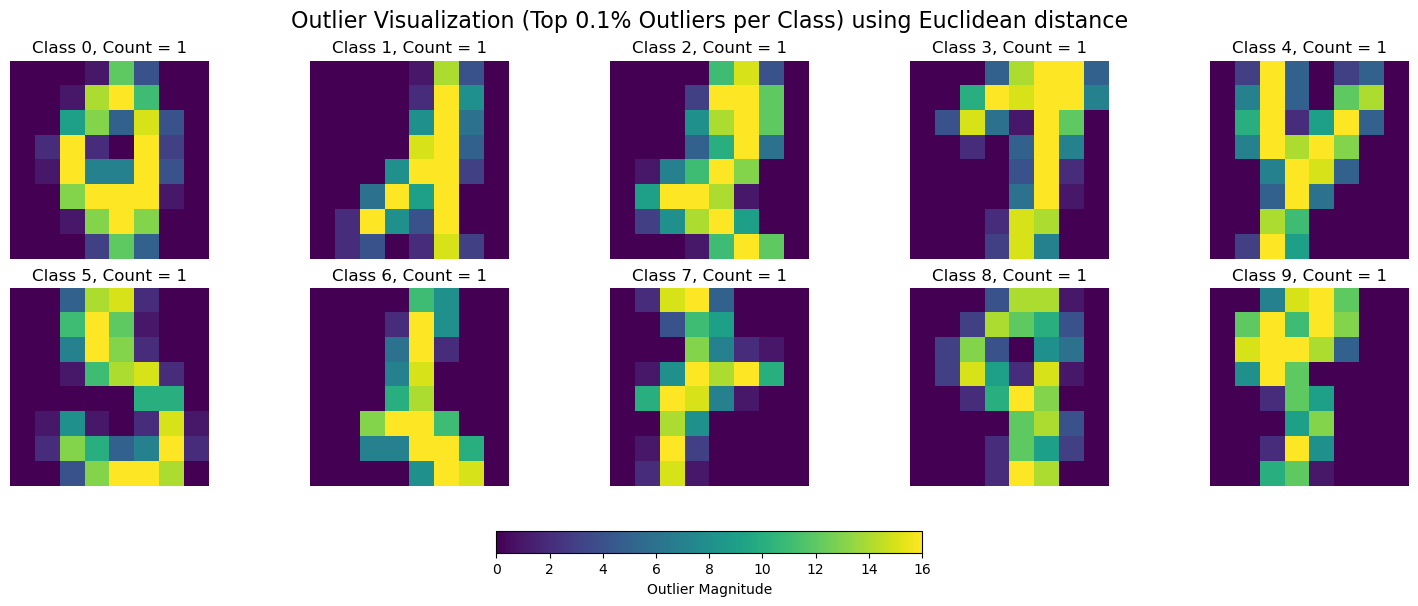

In [16]:
display_outliers(X, y, outlier_fraction=.001)

This approach seems to work, since we are seeing images that visually do not resemble the means in some cases. Notebly we have the 6 and 3. These two outliers are not clearly distinguisable for any class. Perhaps they can be considered a 1.

In [17]:
from enum import Enum
from sklearn.metrics.pairwise import cosine_distances

def euclidean_distance(X_class, mean_vector):
    return np.linalg.norm(X_class - mean_vector, axis=1)

def cosine_distance(X_class, mean_vector):
    return cosine_distances(X_class, mean_vector.values.reshape(1, -1)).flatten()

# we love enums
class DistanceMetric(Enum):
    EUCLIDEAN = (euclidean_distance, )
    L2 = (euclidean_distance, )
    COSINE = (cosine_distance, )
    COSINE_DISTANCES = (cosine_distance, )

    def __new__(cls, distance_function):
        obj = object.__new__(cls)
        obj._value_ = distance_function
        return obj

    def compute(self, X_class, mean_vector):
        return self.value(X_class, mean_vector)

In [18]:
import math
from typing import Callable

from sklearn.metrics.pairwise import cosine_distances

def display_all_outliers(X: pd.DataFrame, y: pd.DataFrame, outlier_fraction: float = .01, distance: str or Callable = 'euclidean'):
    """
    WARNING: more than 10% of outliers displayed will take a lot of time due to the slowness
    of matplotlib
    """

    assert 1 >= outlier_fraction > 0

    n_classes = 10

    for specific_class in range(n_classes):
        X_class = X[y['class'] == specific_class]
        
        mean_vector = X_class.mean()

        # huge match for the distances ENUM
        try:
            if type(distance) == str:
                metric = DistanceMetric[distance.upper()]
            else:
                metric = distance
            distances = metric.compute(X_class, mean_vector)
        except KeyError:
            raise ValueError(f'Unknown metric used {distance}')
            break

        threshold = np.percentile(distances, 100 * (1 - outlier_fraction))
        
        outlier_indices = np.where(distances >= threshold)[0]
        sorted_outlier_indices = outlier_indices[np.argsort(distances[outlier_indices])[::-1]]
        outliers = X_class.iloc[sorted_outlier_indices]
        sorted_distances = distances[sorted_outlier_indices]
        
        n_outliers = len(outliers)
        cols = min(5, n_outliers)  # Limit columns to 5 for better readability
        rows = math.ceil(n_outliers / cols)
        
        fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3), constrained_layout=True)
        axes = np.array(axes).reshape(-1)

        fig.suptitle(
            f'Class {specific_class} Outliers (Top {100 * outlier_fraction:.1f}%, {n_outliers} instances)',
            fontsize=16
        )

        for i, (index, outlier) in enumerate(outliers.iterrows()):
            ax = axes[i]
            outlier_matrix = outlier.values.reshape(8, 8)
            im = ax.imshow(outlier_matrix, cmap='viridis')
            ax.set_title(f'Instance {index}\nDist: {sorted_distances[i]:.2f}')
            ax.axis('off')

        for ax in axes[n_outliers:]:
            ax.axis('off')

        cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.05, pad=0.1)
        cbar.set_label('Outlier Magnitude')
        plt.show()

We can futher visualization looking at the top images further from the means instead of just one. The images are ordered from furthest distances to least. We also display the image datapoint number.

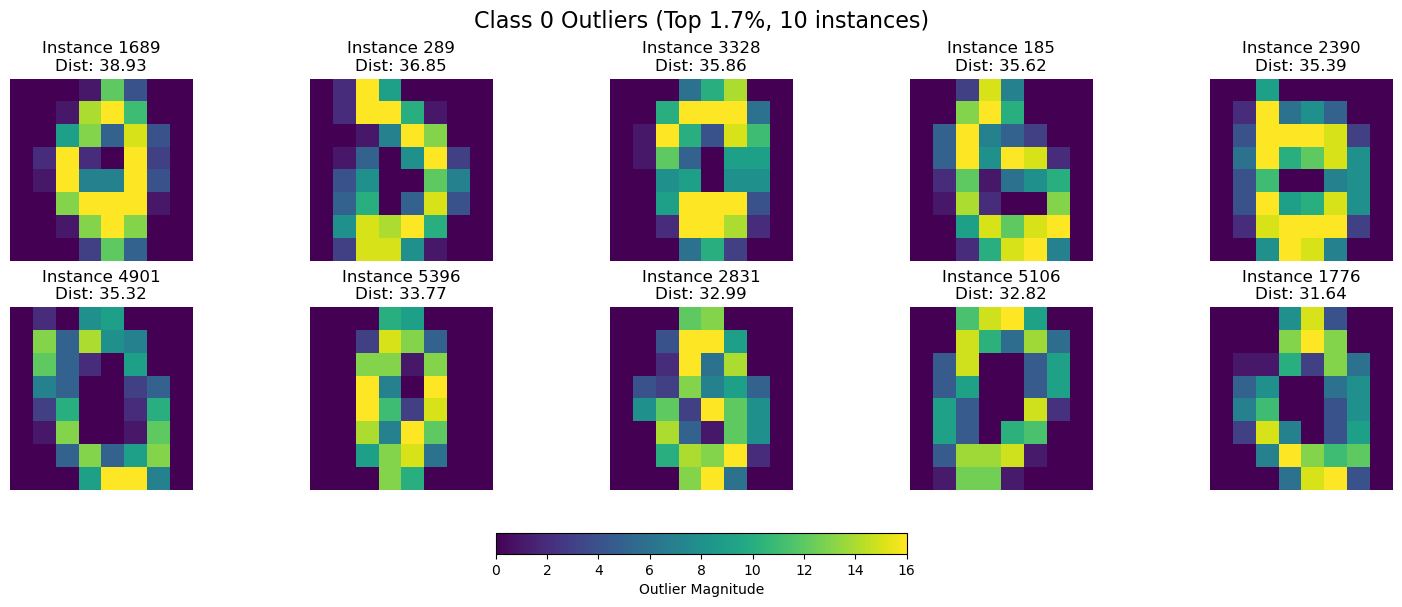

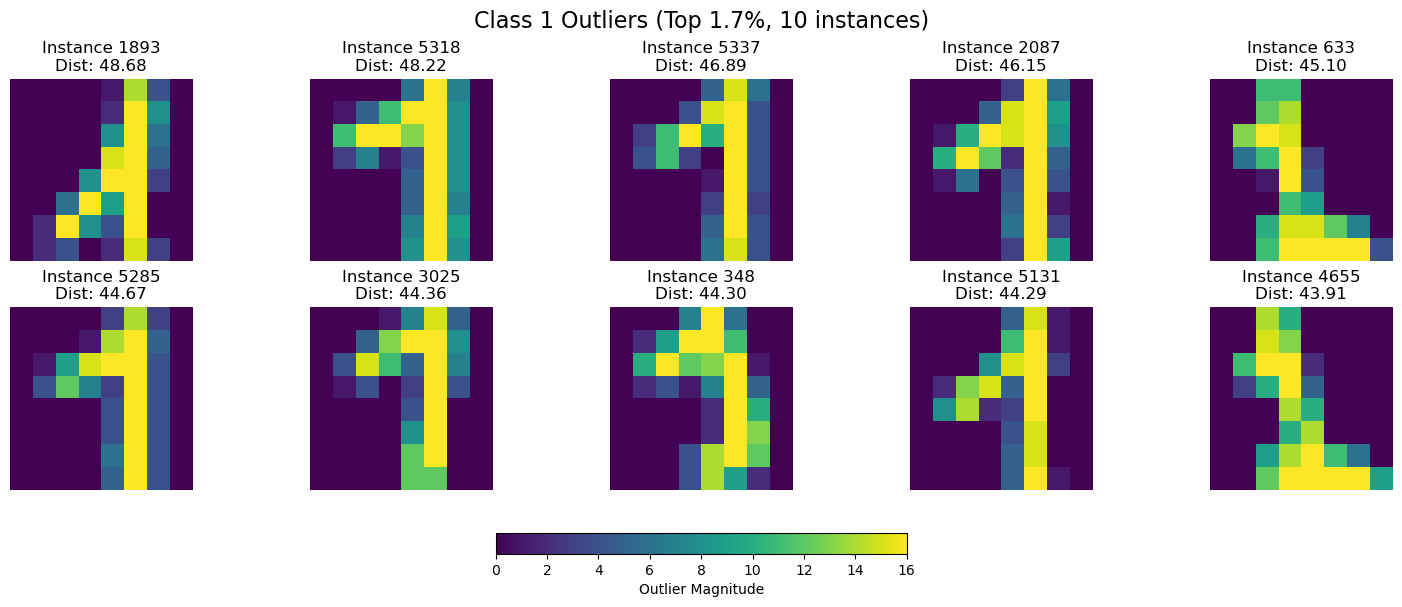

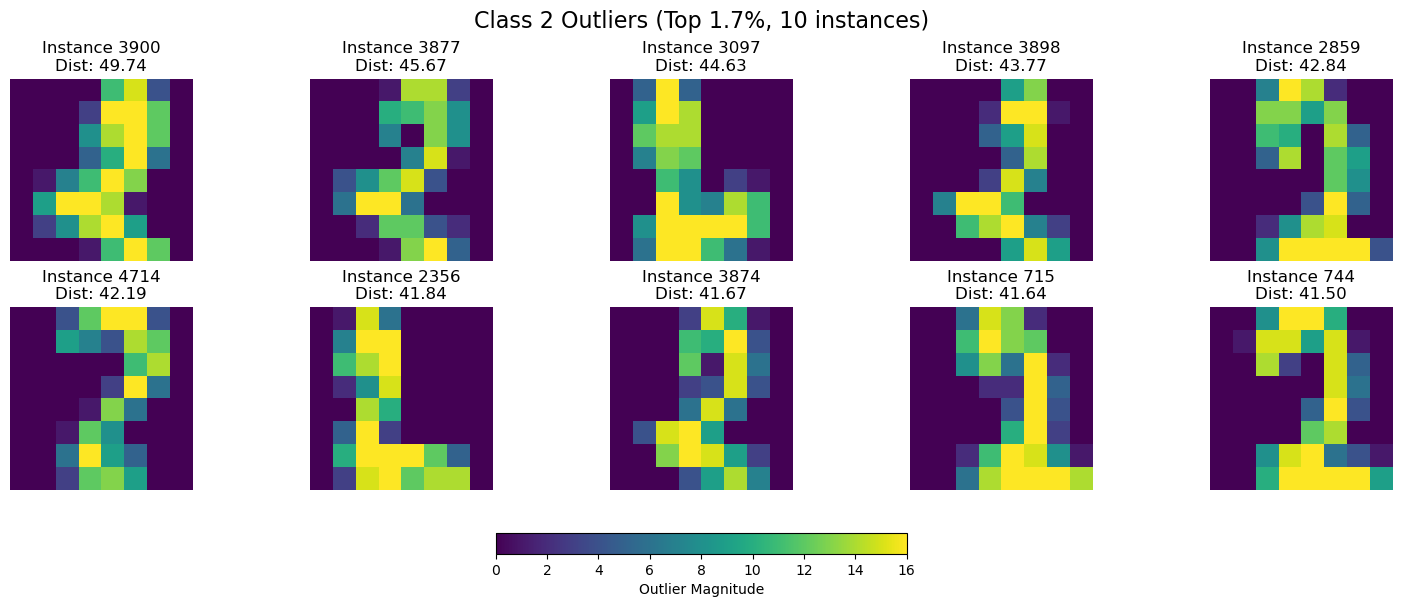

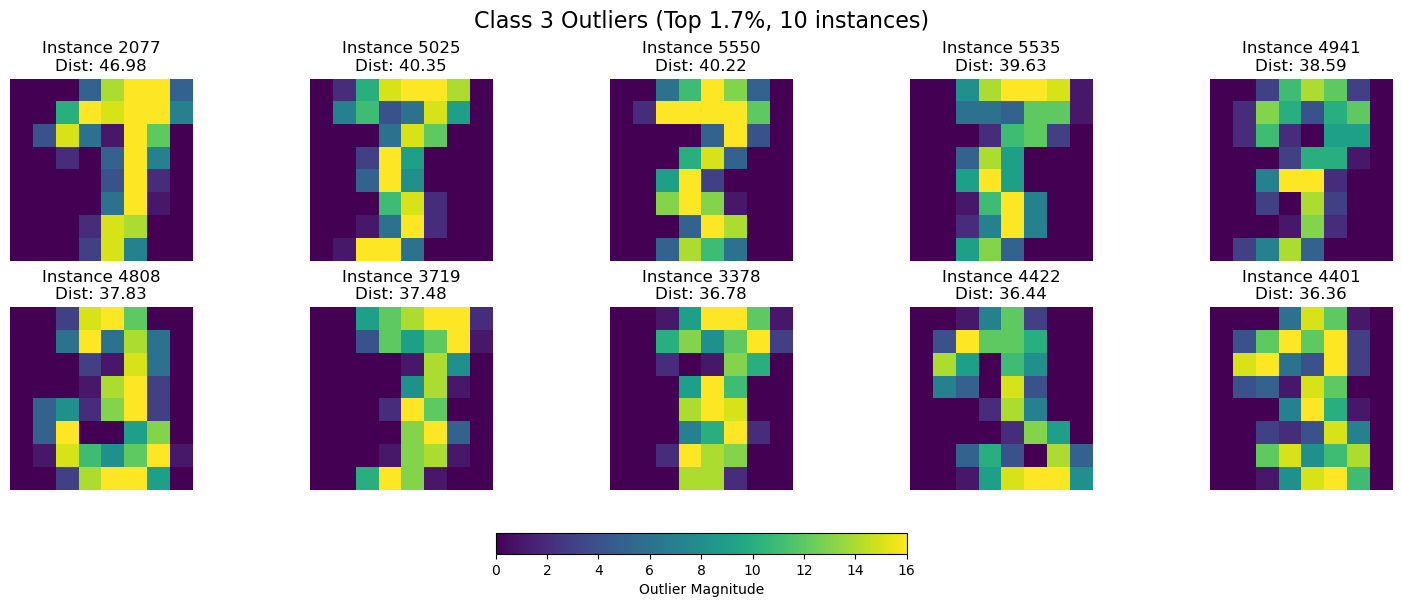

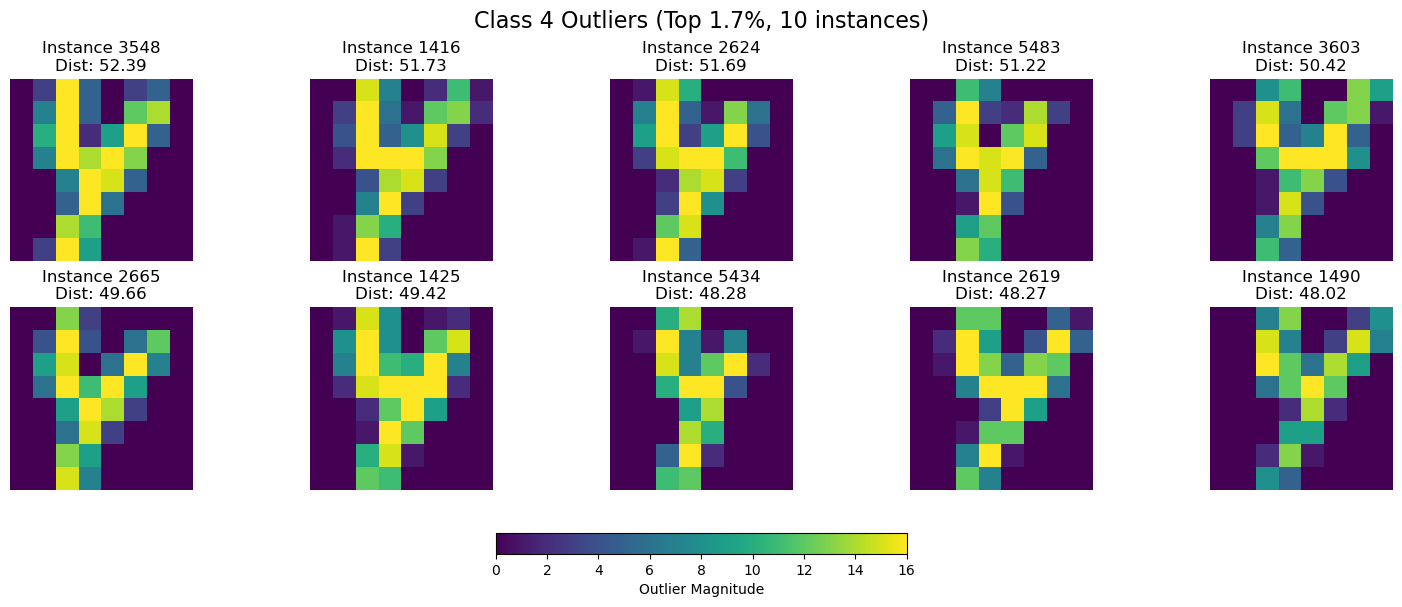

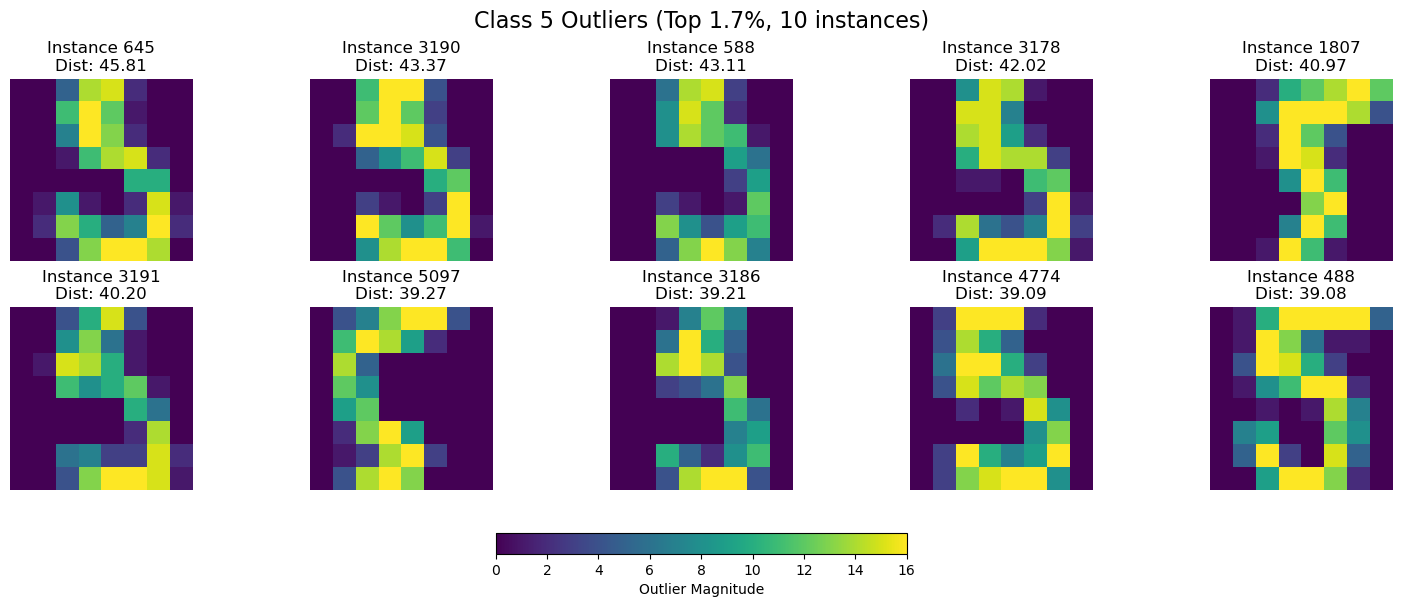

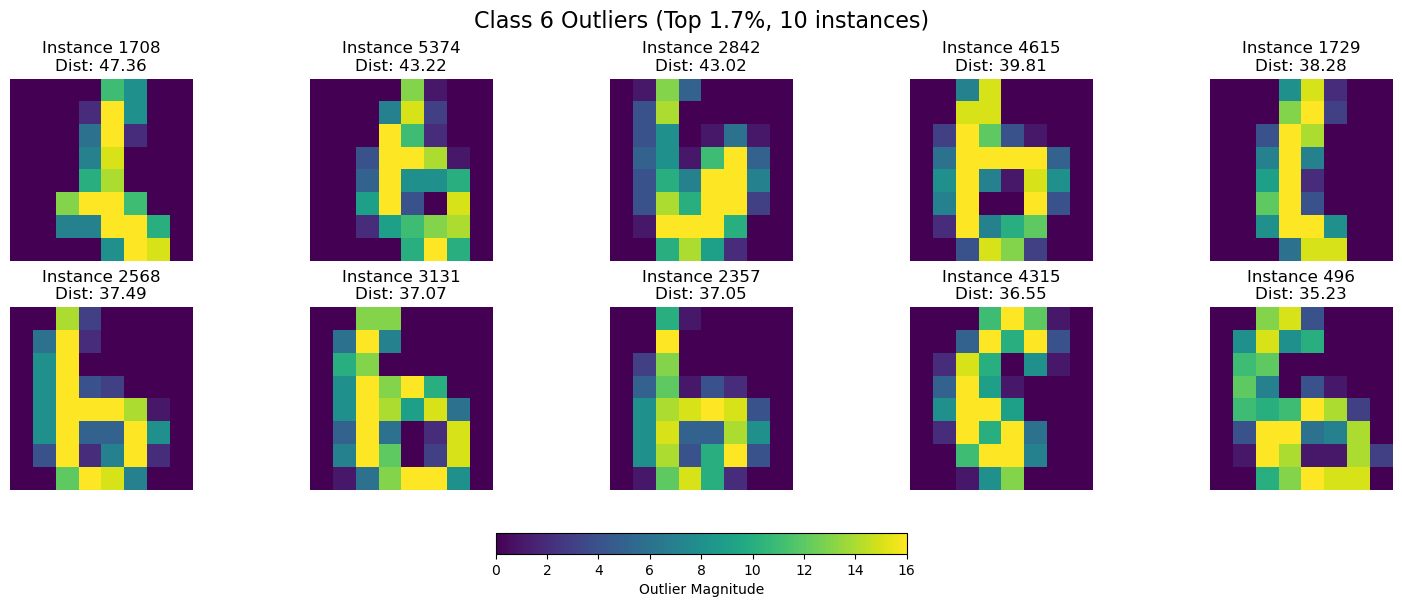

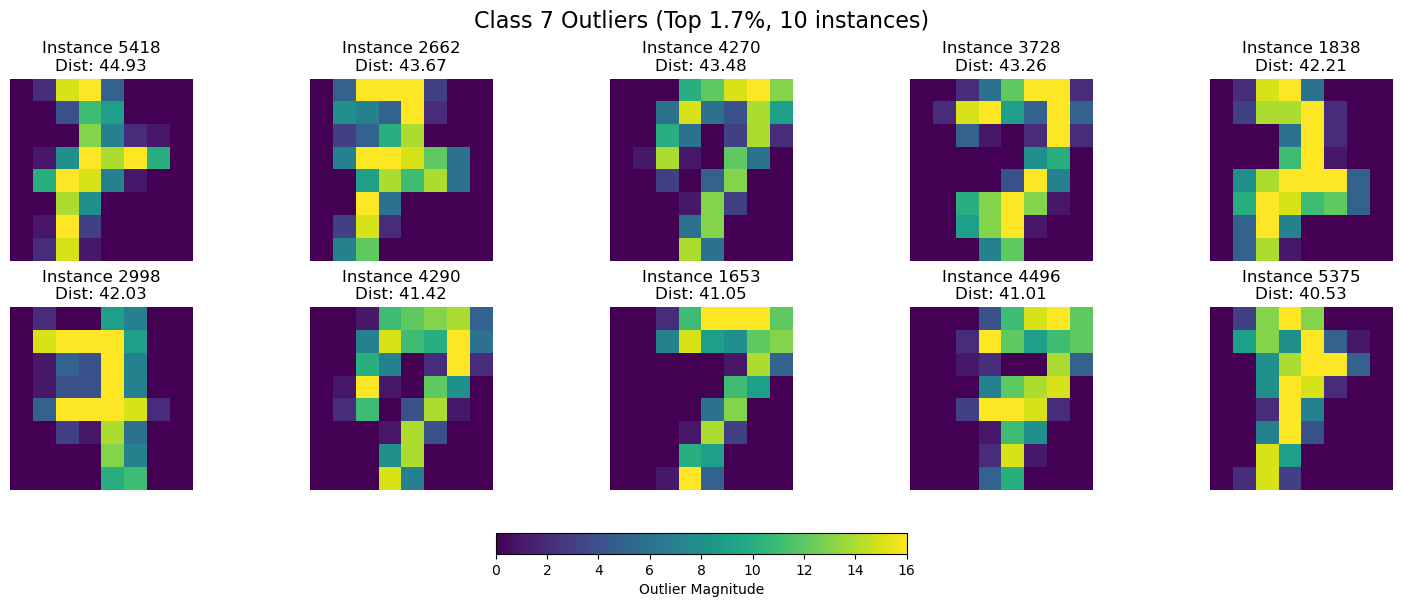

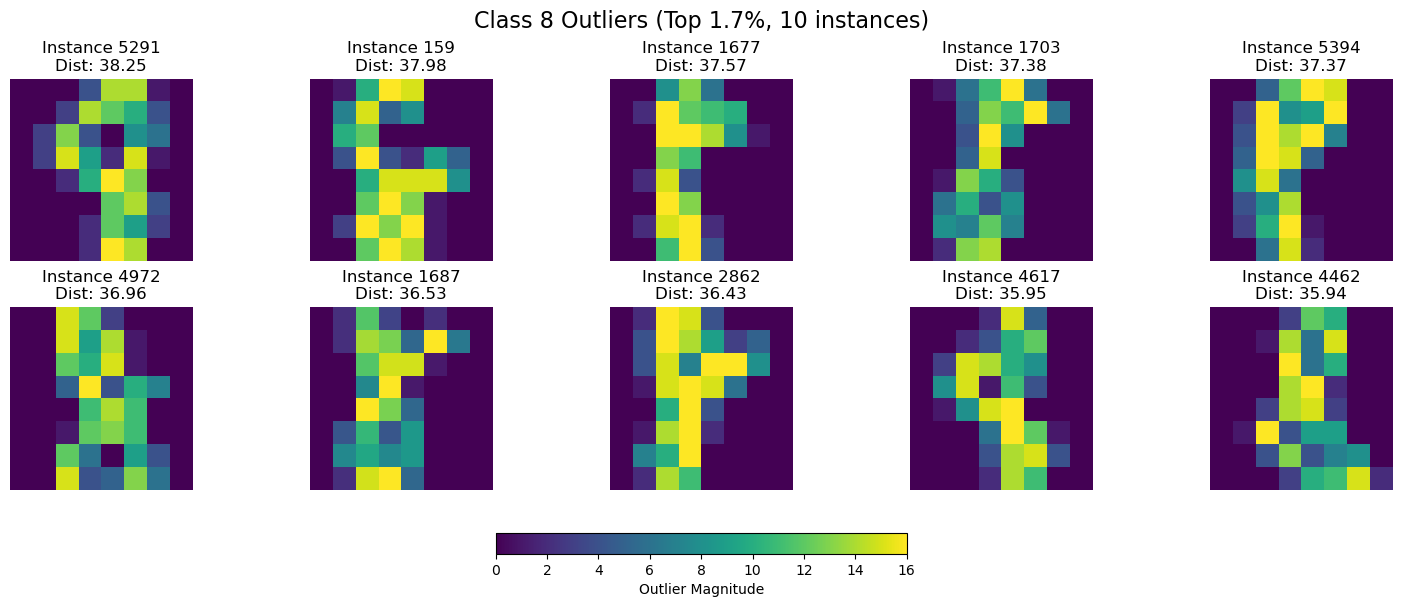

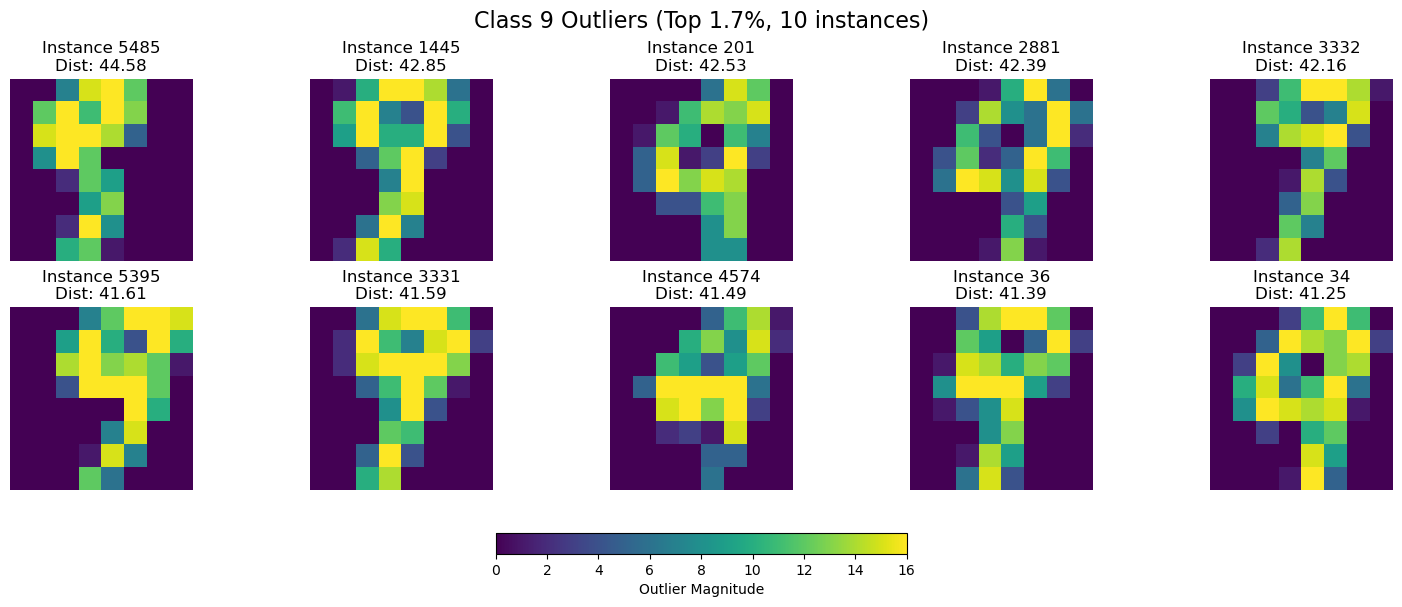

In [19]:
display_all_outliers(X, y, outlier_fraction=.017, distance='l2')

Looking at more images that could be considered outliers, we see how the previous examples are not alone.

There are some classes that seem pretty consistent (e.g. 4 and 1). Others ones, like 2 and 6 seem the least consistent. We could also consider the 9.

However this type of manual analysis is of no value to use. We consider that to see the effect of the outliers we should remove them from the dataset and see at which point we can achieve the maximum accuracy possible.

#### Entropy and Skewness

Since we have now compared the classes from each others using the means. Now we can do analysis class by class, comparing how different the images whitin the class are.

We choose two metrics; entropy and skewness.

In [20]:
def entropy(vector):

  # convert vector into a proability distribution
  total = np.sum(vector)
  probabilities = vector/total

  #calculate entropy
  entropy = -np.sum(probabilities * np.log2(probabilities + 1e-10))

  return entropy

Let's compute the entopy for the first 10 digits:



In [21]:
entropies = []

for index, row in X.iterrows():
  entropy_value = entropy(row.values)
  entropies.append(entropy_value)

for x in range(10):
  print(f"entropy for digit {x}: {entropies[x]}")

entropy for digit 0: 4.9724476219786595
entropy for digit 1: 4.987248868896388
entropy for digit 2: 4.7289441942799275
entropy for digit 3: 4.7370580960152076
entropy for digit 4: 4.771052834216457
entropy for digit 5: 4.979596715934461
entropy for digit 6: 4.747802083348315
entropy for digit 7: 4.762383211766675
entropy for digit 8: 5.045463617754645
entropy for digit 9: 5.053755616923365


The entropy values that we obtain are moderate, ranging between 4.73 and 5.05. What is really important is the comparison between these values:

- Higher entropy values, like those for digits 8 and 9 indicate that the images have a pixel intensity more diverse or spread out than those with lower entropy values, such as digit 2 or 3, taht suggest that the pixel intensities are more uniform or concentrated.


We will compute the entropy for each class, first including zero values, and then using only nonzero pixels:

Text(0.5, 1.0, 'Entropy for Each Class')

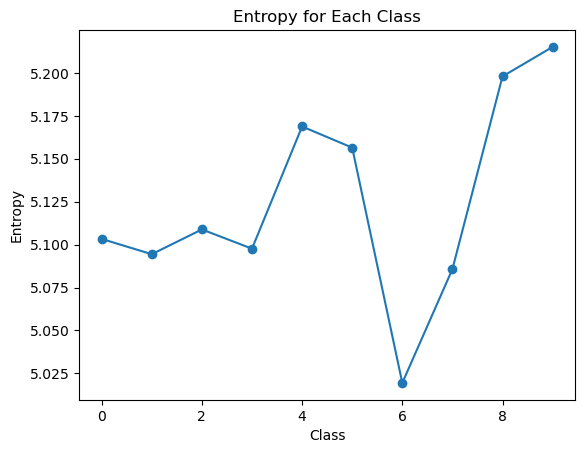

In [22]:
entropies = []

for specific_class in range(10):
    X_class = X[y['class'] == specific_class]
    means_class = X_class.mean()
    mean_matrix_class = means_class.values.reshape(8, 8)
    entropy_value = entropy(mean_matrix_class.flatten())
    entropies.append(entropy_value)

plt.plot(entropies, marker='o')
plt.xlabel('Class')
plt.ylabel('Entropy')
plt.title('Entropy for Each Class')

After doing these computations, we can see that the entropy varies for each class, meaning that each pixel has a different level of variability.
Entropy measures randomness or disorder, with higher entropy indicating more complex or diverse patterns. Class 9 has the highest entropy (5.215), reflecting greater variability, while class 6 has the lowest (5.019). 

And we do the same with the values non zeros:

Text(0.5, 1.0, 'Entropy for Each Class (Nonzero Values)')

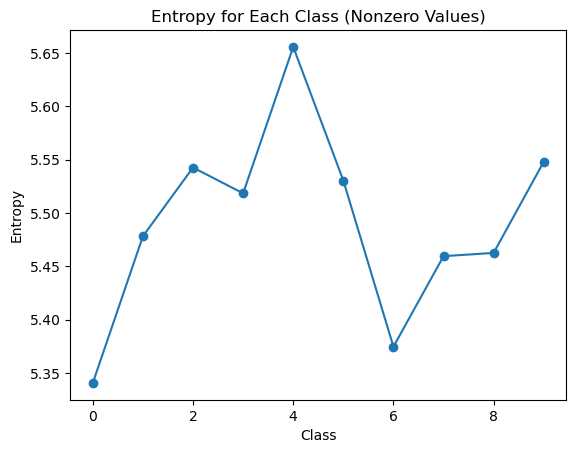

In [23]:
entropies_nonzero = []
for specific_class in range(10):
    X_class = X[y['class'] == specific_class]
    nonzero = X_class[X > 0]
    entropy_value = entropy(nonzero.mean())
    entropies_nonzero.append(entropy_value)

plt.plot(entropies_nonzero, marker='o')
plt.xlabel('Class')
plt.ylabel('Entropy')
plt.title('Entropy for Each Class (Nonzero Values)')

When considering only non-zero values, both entropy slightly increase (e.g., class 1 entropy rises from 5.10 to 5.34), indicating reduced uniformity and greater variability in the active regions of the images.


Now we will define a function to compute the skewness, another metric which will be useful to study our dataset:

- **High skewness**: Likely have a small number of very large values dominating the distribution of non-zero entries.

- **Low skewness**: Non-zero values are more evenly distributed or clustered around a typical range.

Skewness for class 0: 0.12290207339777708
Skewness for class 1: 0.27716821840328565
Skewness for class 2: 0.353761008750632
Skewness for class 3: 0.377762411063036
Skewness for class 4: 0.47305748639565387
Skewness for class 5: 0.40247934313794886
Skewness for class 6: 0.21802379032010924
Skewness for class 7: 0.2953019025330024
Skewness for class 8: 0.016811635077020097
Skewness for class 9: 0.28058789324296046


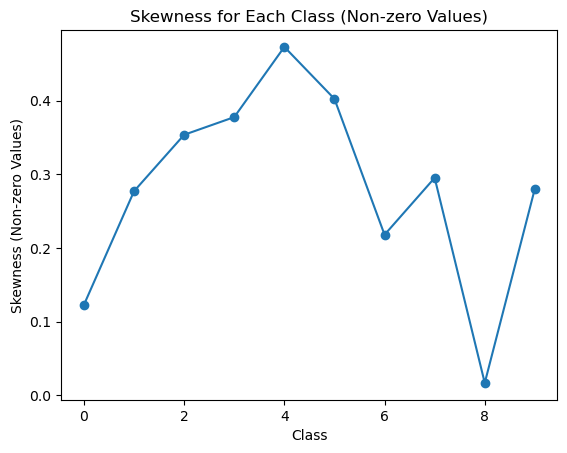

In [24]:
from scipy.stats import skew

# Define the skewness calculation function
def skewness_nonzero(vector):
    nonzero = vector[vector > 0]
    return skew(nonzero)

# List to store skewness values for each class
skewness_values = []

for specific_class in range(10):
    # Filter rows for the specific class
    X_class = X[y['class'] == specific_class]

    # Calculate the mean for the class
    means_class = X_class.mean()
    mean_matrix_class = means_class.values.reshape(8, 8)

    # Flatten the mean matrix and calculate skewness for non-zero values
    skewness_value = skewness_nonzero(mean_matrix_class.flatten())
    skewness_values.append(skewness_value)

    print(f'Skewness for class {specific_class}: {skewness_value}')

# Plot the skewness values
plt.plot(skewness_values, marker='o')
plt.xlabel('Class')
plt.ylabel('Skewness (Non-zero Values)')
plt.title('Skewness for Each Class (Non-zero Values)')
plt.show()

A positive **skew** indicates a few high values dominating the vector, which could correlate with sparsity and larger magnitudes.

Skewness for class 0: 0.5487394951481452
Skewness for class 1: 0.5844419736309746
Skewness for class 2: 0.5784743054804072
Skewness for class 3: 0.6009324759892049
Skewness for class 4: 0.5875545139709131
Skewness for class 5: 0.6105418498893687
Skewness for class 6: 0.5750625040645608
Skewness for class 7: 0.6242103435711017
Skewness for class 8: 0.3507255372657296
Skewness for class 9: 0.5114992905701239


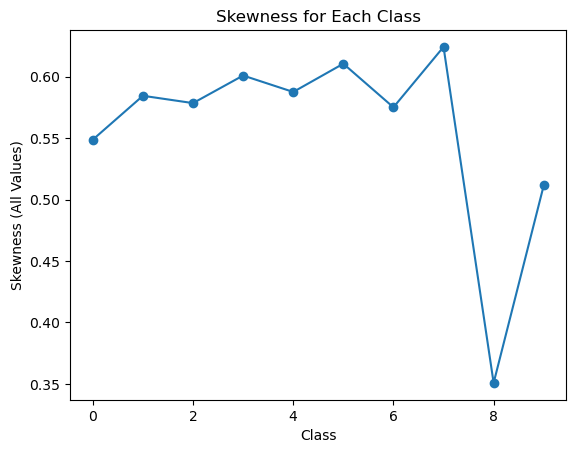

In [25]:
skewness_values = []

for specific_class in range(10):
    X_class = X[y['class'] == specific_class]

    means_class = X_class.mean()
    mean_matrix_class = means_class.values.reshape(8, 8)

    skewness_value = skew(mean_matrix_class.flatten())
    skewness_values.append(skewness_value)

    print(f'Skewness for class {specific_class}: {skewness_value}')

# Plot the skewness values
plt.plot(skewness_values, marker='o')
plt.xlabel('Class')
plt.ylabel('Skewness (All Values)')
plt.title('Skewness for Each Class')
plt.show()

The low skewness on class 8 means that all of the features/pixels are more evenly distributed. The domination of the larger values is not as strong as on the other classes.

Skewness is useful for:

- Understanding the asymmetry of the data (in this case, the digit images) and how the pixel values are distributed.

- Detecting if a digit class has a distribution skewed towards lower or higher pixel values, which could help understand how those digits are visually formed.

- Performing exploratory analysis to detect patterns and important characteristics before training machine learning models.



# Data Preprocessing

Now that we've explored and understood our data we can start to prepare it and apply different models to search for the best performing one. We will start by using the `StandardScaler`function from `sklearn.preprocessing` to standardize the features (transforming them to have a mean of 0 and standard deviation of 1). Which is a very important step to ensure that features are comparable in terms of scale.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

(-0.5, 7.5, 7.5, -0.5)

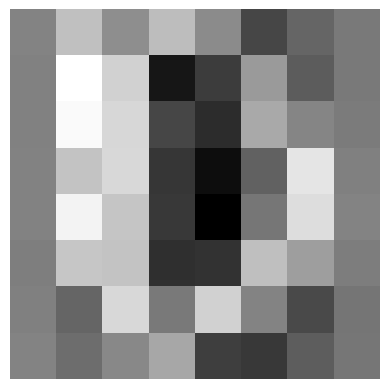

In [27]:
plt.imshow(X_scaled[0].reshape(8, 8), cmap='gray')
plt.axis('off')

We can see the visualization passed through the scaler.

(-0.5, 7.5, 7.5, -0.5)

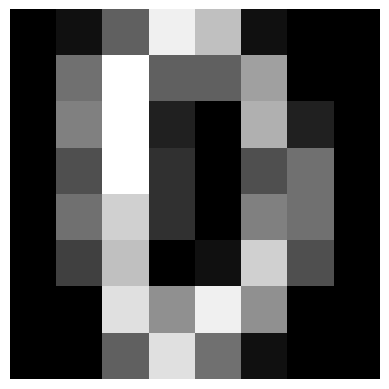

In [28]:
plt.imshow(scaler.inverse_transform(X_scaled)[0].reshape(8, 8), cmap='gray')
plt.axis('off')

If we apply the inverse, the less important pixels appear darker.

We will continue by dividing our data into training and test sets:


In [29]:
from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

(-0.5, 7.5, 7.5, -0.5)

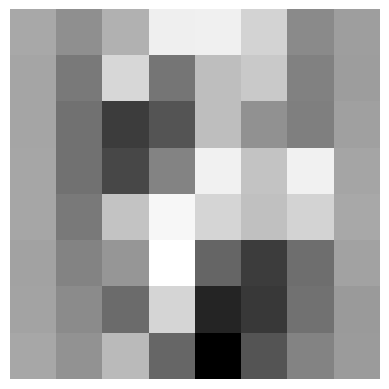

In [30]:
plt.imshow(X_test_scaled[0].reshape(8, 8), cmap='gray')
plt.axis('off')

# SVM Implementation

Now we will fit an SVM model to our training data by using the `SVC`function of `sklearn.svm`.
And we will compute some metrics in order to check for the model's performance:

In [31]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import SVC
svm_model_scaled = SVC(kernel='rbf', random_state=42)

svm_model_scaled.fit(X_train_scaled, y_train_scaled)
y_pred_scaled = svm_model_scaled.predict(X_test_scaled)

cm = confusion_matrix(y_test_scaled, y_pred_scaled)

print("Accuracy:", accuracy_score(y_test_scaled, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test_scaled, y_pred_scaled))

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9893238434163701
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.98      1.00      0.99       102
           2       1.00      0.99      1.00       107
           3       0.98      0.97      0.98       118
           4       0.97      0.99      0.98       117
           5       0.97      1.00      0.98        97
           6       0.99      0.99      0.99       123
           7       1.00      1.00      1.00       124
           8       0.99      0.98      0.99       105
           9       1.00      0.97      0.98       123

    accuracy                           0.99      1124
   macro avg       0.99      0.99      0.99      1124
weighted avg       0.99      0.99      0.99      1124



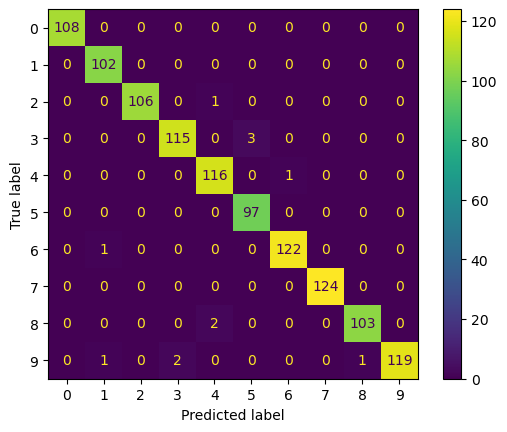

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model_scaled.classes_)
disp.plot()
plt.show()

Our model obtained a really **high accuracy** on the test set (0.9893), and the classification report indicated that most classes are predicted with high precision and recall.

There are a **few misclassifications**, which can be seen in the confusion matrix.

### Performing Grid Search to improve performance

To try to improve the performance of our model, we will perform a grid search to find the best hyperparameters for our classifier:

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [8, 9, 9.5, 10],
    'gamma': [0, .0001, .001, 0.01, 0.1],
    'kernel': ['rbf']#, 'linear', 'sigmoid', 'polynomial']
}

grid_search_scaled = GridSearchCV(SVC(), param_grid, cv=5, verbose=10)
grid_search_scaled.fit(X_train_scaled, y_train_scaled['class'].to_numpy().ravel())

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START C=8, gamma=0, kernel=rbf...................................
[CV 1/5; 1/20] END ....C=8, gamma=0, kernel=rbf;, score=0.104 total time=   0.9s
[CV 2/5; 1/20] START C=8, gamma=0, kernel=rbf...................................
[CV 2/5; 1/20] END ....C=8, gamma=0, kernel=rbf;, score=0.105 total time=   0.9s
[CV 3/5; 1/20] START C=8, gamma=0, kernel=rbf...................................
[CV 3/5; 1/20] END ....C=8, gamma=0, kernel=rbf;, score=0.103 total time=   1.2s
[CV 4/5; 1/20] START C=8, gamma=0, kernel=rbf...................................
[CV 4/5; 1/20] END ....C=8, gamma=0, kernel=rbf;, score=0.105 total time=   1.3s
[CV 5/5; 1/20] START C=8, gamma=0, kernel=rbf...................................
[CV 5/5; 1/20] END ....C=8, gamma=0, kernel=rbf;, score=0.105 total time=   0.9s
[CV 1/5; 2/20] START C=8, gamma=0.0001, kernel=rbf..............................
[CV 1/5; 2/20] END C=8, gamma=0.0001, kernel=rb

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [8, 9, 9.5, 10],
                         'gamma': [0, 0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['rbf']},
             verbose=10)

Now we will compute the accuracy of the new model that uses the hyperparameters resulting from the grid search.

In [34]:
print("Best Parameters:", grid_search_scaled.best_params_)

best_svm_model_scaled = grid_search_scaled.best_estimator_

y_pred_best = best_svm_model_scaled.predict(X_test_scaled)
print("Best Model Accuracy:", accuracy_score(y_test_scaled, y_pred_best))

Best Parameters: {'C': 8, 'gamma': 0.01, 'kernel': 'rbf'}
Best Model Accuracy: 0.9911032028469751


As we can see, by using the function `GridSearchCV` and finding proper hyperparameters for our model, we were able to increase the accuracy of our model on the test set to a 99.1%

### Scaled Features vs No-Scaled


Comparing scaled features versus non-scaled features highlights the impact of feature scaling on model performance, accuracy, and convergence in machine learning tasks.

In [35]:
X_np, y_np = np.array(X), np.array(y)
X_train, X_test, y_train, y_test= train_test_split(X_np, y_np, test_size=.2, random_state=42)

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [8, 9, 9.5, 10],
    'gamma': [0, .0001, .001, 0.01, 0.1],
    'kernel': ['rbf']#, 'linear', 'sigmoid', 'polynomial']
}

grid_search= GridSearchCV(SVC(), param_grid, cv=5, verbose=10)
grid_search.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START C=8, gamma=0, kernel=rbf...................................
[CV 1/5; 1/20] END ....C=8, gamma=0, kernel=rbf;, score=0.104 total time=   0.9s
[CV 2/5; 1/20] START C=8, gamma=0, kernel=rbf...................................
[CV 2/5; 1/20] END ....C=8, gamma=0, kernel=rbf;, score=0.105 total time=   0.9s
[CV 3/5; 1/20] START C=8, gamma=0, kernel=rbf...................................
[CV 3/5; 1/20] END ....C=8, gamma=0, kernel=rbf;, score=0.103 total time=   0.8s
[CV 4/5; 1/20] START C=8, gamma=0, kernel=rbf...................................
[CV 4/5; 1/20] END ....C=8, gamma=0, kernel=rbf;, score=0.105 total time=   0.8s
[CV 5/5; 1/20] START C=8, gamma=0, kernel=rbf...................................
[CV 5/5; 1/20] END ....C=8, gamma=0, kernel=rbf;, score=0.105 total time=   0.9s
[CV 1/5; 2/20] START C=8, gamma=0.0001, kernel=rbf..............................
[CV 1/5; 2/20] END C=8, gamma=0.0001, kernel=rb

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [8, 9, 9.5, 10],
                         'gamma': [0, 0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['rbf']},
             verbose=10)

In [37]:
best_svm_model = grid_search.best_estimator_
y_pred_best = grid_search.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Parameters:", grid_search.best_params_)

Best Model Accuracy: 0.9955516014234875
Best Parameters: {'C': 8, 'gamma': 0.001, 'kernel': 'rbf'}


IMPORTANT: Is not necessary for us to do feature scaling.

### Applying PCA to check its effects

As the exploration of the data showed, there are a lot of pixels which are redundant, specially those in the surroundings of the image. Which suggests that applying PCA could be a good option. Because of this, we will apply it and analyze the effects it has on our model's performance, and how it compares with the previous models that we trained.

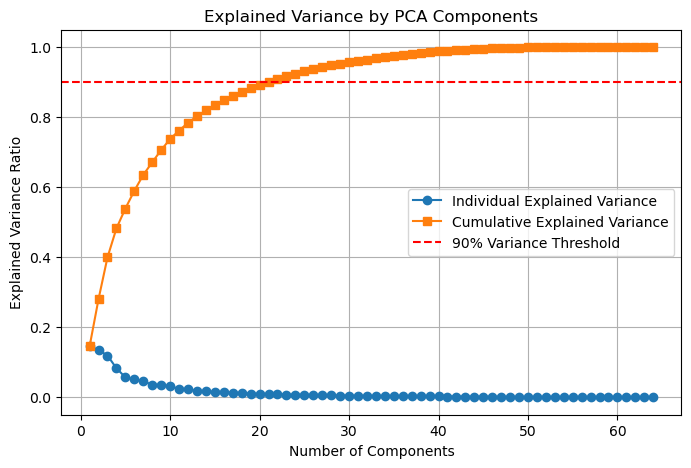

In [38]:
from sklearn.decomposition import PCA

X_pca = X.copy()

pca = PCA()
pca.fit(X_pca)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 5))

# Plot individual explained variance
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    marker='o',
    label='Individual Explained Variance',
)

# Plot cumulative explained variance
plt.plot(
    range(1, len(cumulative_variance_ratio) + 1),
    cumulative_variance_ratio,
    marker='s',
    label='Cumulative Explained Variance',
)

plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')
plt.legend()
plt.grid()
plt.show()

To address dimensionality reduction, applying PCA to the dataset reduced the features from 64 to 20 while retaining 90% of the cumulative variance, as shown in Figure 3. However, as mentioned earlier, we will not use PCA or other dimensionality reduction techniques moving forward.

As shown in the plot, by applying PCA we can reduce the number of features to the half. Getting rid of redundant ones.

In [39]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

pca.fit_transform(X_train_pca)
pca.fit_transform(X_test_pca)

array([[-1.75427397e+01,  6.65079717e+00,  7.19657583e+00, ...,
         0.00000000e+00, -1.77009467e-15,  2.29200828e-14],
       [ 1.36589965e+01, -2.20639919e+00, -2.11049058e+01, ...,
         0.00000000e+00, -1.35072679e-15, -1.38698250e-14],
       [-2.21691268e+01, -3.63917884e+00, -7.17100921e+00, ...,
         0.00000000e+00, -3.77016965e-16, -1.41369732e-14],
       ...,
       [ 1.75392784e+00, -1.58139340e+01,  2.39654309e+01, ...,
         0.00000000e+00, -1.68000371e-15,  3.19444400e-14],
       [-7.13213640e+00, -4.47453115e+00, -2.13897293e+00, ...,
         0.00000000e+00, -6.96358964e-16, -1.60463841e-14],
       [ 1.02313930e+01,  1.89458530e+01, -1.14704792e+01, ...,
         0.00000000e+00,  6.97465881e-16,  9.96202495e-15]])

Now we will train another model with the principal components obtained:

In [40]:
svm_model_pca = SVC(kernel='rbf', random_state=42)

svm_model_pca.fit(X_train_pca, y_train)

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=42)

And check some performance metrics of the model:

In [41]:
y_pred_pca = svm_model_pca.predict(X_test_pca)

print("Accuracy:", accuracy_score(y_test_pca, y_pred_pca))
print("Classification Report:\n", classification_report(y_test_pca, y_pred_pca))
print("Confusion Matrix:\n", confusion_matrix(y_test_pca, y_pred_pca))

Accuracy: 0.9902135231316725
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       108
           1       0.99      1.00      1.00       102
           2       1.00      1.00      1.00       107
           3       0.97      0.97      0.97       118
           4       0.99      0.99      0.99       117
           5       0.96      0.99      0.97        97
           6       0.99      0.99      0.99       123
           7       1.00      1.00      1.00       124
           8       0.99      1.00      1.00       105
           9       1.00      0.97      0.98       123

    accuracy                           0.99      1124
   macro avg       0.99      0.99      0.99      1124
weighted avg       0.99      0.99      0.99      1124

Confusion Matrix:
 [[107   0   0   0   1   0   0   0   0   0]
 [  0 102   0   0   0   0   0   0   0   0]
 [  0   0 107   0   0   0   0   0   0   0]
 [  0   0   0 115   0   3   0   0   0   

By looking at the metrics we can see that we obtained a slightly higher test accuracy than on the first classifier that we trained (99% vs 98.8%). However, there is not a lot of difference and there are still misclassified points.

### Basic Ablation Study

Comparing between the basic model with and without PCA and feature scaling. Grid search was used to see ensure that the best hyperparamters were chosen in each case.

In [42]:
pca = PCA()
pca.fit_transform(X_pca)

X_scaled_pca = scaler.fit_transform(X_pca)

In [43]:
# Function to train SVM and perform GridSearch
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, param_grid):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

    X_train, y_train = np.array(X_train), np.array(y_train)
    
    grid_search.fit(X_train, y_train.ravel())

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    return {
        'Best Params': grid_search.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }, grid_search

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X_train, X_test, y_train, y_test= train_test_split(X_np, y_np, test_size=.2, random_state=42) # barefones
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42) # pca
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # feature scaling
X_train_scaled_pca, X_test_scaled_pca, y_train_scaled_pca, y_test_scaled_pca = train_test_split(X_scaled_pca, y, test_size=0.2, random_state=42) # feature scaling

# Define the hyperparameter grid for SVM
param_grid = {
    'C': [8, 9, 9.5, 10],
    'gamma': [0, .0001, .001, 0.01, 0.1],
}

# Train SVM models on the 4 datasets
results = {}
results['Barebones'], _ = train_and_evaluate_svm(X_train, X_test, y_train, y_test, param_grid)
results['PCA'], _ = train_and_evaluate_svm(X_train_pca, X_test_pca, y_train_pca, y_test_pca, param_grid)
results['Scaled'], _ = train_and_evaluate_svm(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, param_grid)
results['Scaled + PCA'], _ = train_and_evaluate_svm(X_train_scaled_pca, X_test_scaled_pca, y_train_scaled_pca, y_test_scaled_pca, param_grid)

# Display results in a table
results_df = pd.DataFrame(results).T

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [45]:
print(results_df)

                           Best Params  Accuracy Precision    Recall  F1-Score
Barebones     {'C': 8, 'gamma': 0.001}  0.995552  0.995603  0.995552  0.995546
PCA           {'C': 8, 'gamma': 0.001}  0.995552  0.995603  0.995552  0.995546
Scaled         {'C': 8, 'gamma': 0.01}  0.991103  0.991125  0.991103  0.991093
Scaled + PCA   {'C': 8, 'gamma': 0.01}  0.991103  0.991125  0.991103  0.991093


The model performs slightly better without scaling or PCA, indicating that these transformations (scaling and PCA) may not be necessary for this specific model and dataset. The configurations with `C: 8, gamma: 0.001` offer the best performance.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=.2, shuffle=True) # barefones
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, shuffle=True) # pca
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, shuffle=True) # feature scaling
X_train_scaled_pca, X_test_scaled_pca, y_train_scaled_pca, y_test_scaled_pca = train_test_split(X_scaled_pca, y, test_size=0.2, shuffle=True) # feature scaling

# Define the hyperparameter grid for SVM
param_grid = {
    'C': [8, 9, 9.5, 10],
    'gamma': [0, .0001, .001, 0.01, 0.1],
}

# Train SVM models on the 4 datasets
results_shuffle = {}
results_shuffle['Barebones'], _ = train_and_evaluate_svm(X_train, X_test, y_train, y_test, param_grid)
results_shuffle['PCA'], _ = train_and_evaluate_svm(X_train_pca, X_test_pca, y_train_pca, y_test_pca, param_grid)
results_shuffle['Scaled'], _ = train_and_evaluate_svm(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, param_grid)
results_shuffle['Scaled + PCA'], _ = train_and_evaluate_svm(X_train_scaled_pca, X_test_scaled_pca, y_train_scaled_pca, y_test_scaled_pca, param_grid)

# Display results in a table
results_df_shuffle = pd.DataFrame(results_shuffle).T

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [47]:
results_df_shuffle

,Best Params,Accuracy,Precision,Recall,F1-Score
Barebones,"{'C': 8, 'gamma': 0.001}",0.994662,0.994729,0.994662,0.994669
PCA,"{'C': 8, 'gamma': 0.001}",0.990214,0.990327,0.990214,0.990163
Scaled,"{'C': 8, 'gamma': 0.01}",0.989324,0.989507,0.989324,0.989344
Scaled + PCA,"{'C': 8, 'gamma': 0.01}",0.987544,0.987581,0.987544,0.98753



The table shows that the "Barebones" configuration, with C: 8 and gamma: 0.001, yields the best results across all metrics (accuracy, precision, recall, and F1-score) at approximately 0.9937. The "PCA" configuration offers slightly lower performance, indicating PCA does not provide a significant advantage here. The "Scaled" configuration, with C: 10 and gamma: 0.01, performs the worst, suggesting that scaling negatively impacts the model’s performance. "Scaled + PCA" performs better than "Scaled" but still lags behind the other configurations.


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=.2, shuffle=True) # barefones
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, shuffle=True) # pca
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, shuffle=True) # feature scaling
X_train_scaled_pca, X_test_scaled_pca, y_train_scaled_pca, y_test_scaled_pca = train_test_split(X_scaled_pca, y, test_size=0.2, shuffle=True) # feature scaling

# Define the hyperparameter grid for SVM
param_grid = {
    'C': [8],
    'gamma': [.001],
}

# Train SVM models on the 4 datasets
results_shuffle = {}
results_shuffle['Barebones'], _ = train_and_evaluate_svm(X_train, X_test, y_train, y_test, param_grid)
results_shuffle['PCA'], _ = train_and_evaluate_svm(X_train_pca, X_test_pca, y_train_pca, y_test_pca, param_grid)
results_shuffle['Scaled'], _ = train_and_evaluate_svm(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, param_grid)
results_shuffle['Scaled + PCA'], _ = train_and_evaluate_svm(X_train_scaled_pca, X_test_scaled_pca, y_train_scaled_pca, y_test_scaled_pca, param_grid)

# Display results in a table
results_df_shuffle = pd.DataFrame(results_shuffle).T

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [49]:
results_df_shuffle

,Best Params,Accuracy,Precision,Recall,F1-Score
Barebones,"{'C': 8, 'gamma': 0.001}",0.991103,0.991197,0.991103,0.991123
PCA,"{'C': 8, 'gamma': 0.001}",0.987544,0.987809,0.987544,0.987576
Scaled,"{'C': 8, 'gamma': 0.001}",0.978648,0.978801,0.978648,0.978501
Scaled + PCA,"{'C': 8, 'gamma': 0.001}",0.983096,0.983661,0.983096,0.983162


The best performance is achieved without scaling or PCA, indicating that these transformations may not be necessary for this specific dataset and model. The "Barebones" approach is the most effective.

#### Best Performing Model Analysis

Now we take our best performing model to analyse its mistakes more in depth.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=.2, random_state=42) # barefones

# Define the hyperparameter grid for SVM
param_grid = {
    'C': [7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8],
    'gamma': [.001, 0.002],
}

# Train SVM models on the 4 datasets
results_flagship = {}
results_flagship ['Flagship'], grid_search = train_and_evaluate_svm(X_train, X_test, y_train, y_test, param_grid)

# Display results in a table
results_flagship = pd.DataFrame(results_flagship).T

In [51]:
results_flagship

,Best Params,Accuracy,Precision,Recall,F1-Score
Flagship,"{'C': 7.5, 'gamma': 0.001}",0.995552,0.995603,0.995552,0.995546


In [52]:
best_svm_model = grid_search.best_estimator_
y_pred_best = grid_search.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)
conf_matrix

array([[108,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 102,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 107,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 117,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0, 117,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  97,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0, 122,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 124,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 105,   0],
       [  0,   0,   0,   1,   0,   1,   0,   1,   0, 120]])

The confusion matrix shows that the model performs exceptionally well, with most entries along the diagonal, indicating correct predictions. However, there are some misclassifications, these errors are minimal but suggest areas for improvement in distinguishing between certain classes.

So we want to recognize the missclassified errors and which ones are:

In [53]:
rows, cols = conf_matrix.shape
wrong_classifications = []

for i in range(rows):
    for j in range(cols):
        if i != j and conf_matrix[i, j] > 0:
            wrong_classifications.append((i, j, conf_matrix[i, j]))

for i, j, count in wrong_classifications:
    print(f"truth: {i}, prediction: {j}, Value: {count}")

truth: 3, prediction: 5, Value: 1
truth: 6, prediction: 1, Value: 1
truth: 9, prediction: 3, Value: 1
truth: 9, prediction: 5, Value: 1
truth: 9, prediction: 7, Value: 1


Now, we want to calculate the total number of errors and determine which numbers are most frequently misclassified.

Total errors: 5
True class: 3, Predicted class: 5, Count: 1
True class: 6, Predicted class: 1, Count: 1
True class: 9, Predicted class: 3, Count: 1
True class: 9, Predicted class: 5, Count: 1
True class: 9, Predicted class: 7, Count: 1


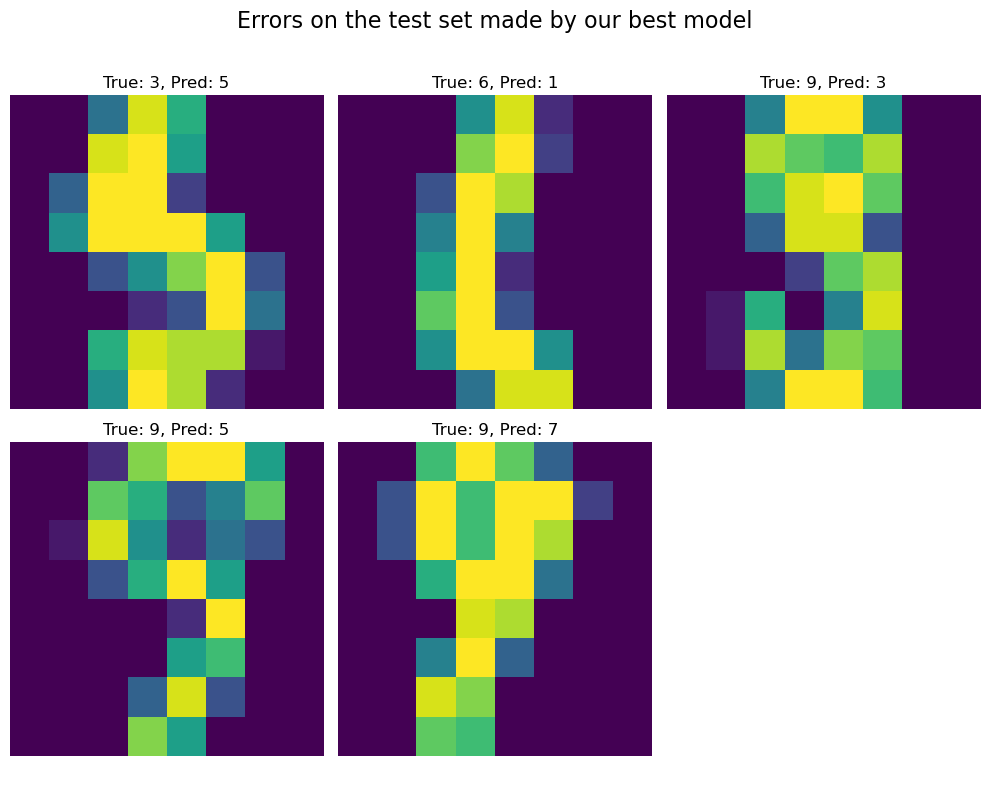

In [54]:
# Calculate the total number of errors
total_errors = sum([wc[2] for wc in wrong_classifications])
print(f"Total errors: {total_errors}")

# Dynamically calculate grid size based on total errors
rows = (total_errors + 2) // 3  # 3 columns, calculate required rows
cols = 3  # Fixed number of columns

# Initialize a single figure for all errors
fig, axes = plt.subplots(rows, cols, figsize=(10, 8))
fig.suptitle(f"Errors on the test set made by our best model", fontsize=16)

# Flatten axes for easy iteration
axes = axes.ravel()
displayed = 0  # Counter for displayed images

# Iterate over wrong classifications
for true_class, pred_class, count in wrong_classifications:
    print(f"True class: {true_class}, Predicted class: {pred_class}, Count: {count}")

    for idx in range(len(y_test_pca)):
        if y_test[idx] == true_class and y_pred_best[idx] == pred_class:
            axes[displayed].imshow(X_test[idx].reshape(8, 8))
            axes[displayed].set_title(f"True: {true_class}, Pred: {pred_class}")
            axes[displayed].axis('off')

            displayed += 1
            count -= 1

            if count <= 0:
                break

for ax in axes[displayed:]:
    ax.axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust top spacing for the title
plt.show()


The misclassifications show that class 9 is the most problematic. This suggests that the model struggles particularly with distinguishing class 9 from other classes, while the other errors are less frequent but still notable. Improving the separation between class 9 and the other classes could help reduce these misclassifications.

# Image Augmentation

In this section of the project, we introduce Data Augmentation to enhance the robustness of our model. We begin by applying image rotations to simulate various distortions, such as noise or real-life variances that the model might encounter when recognizing handwritten digits. This augmentation process aims to test whether the model can accurately identify numbers despite changes in orientation, a common challenge in practical scenarios. 


Our goal is to modify the data in order to find the model's limits and determine which model will be the best for classifying our data.

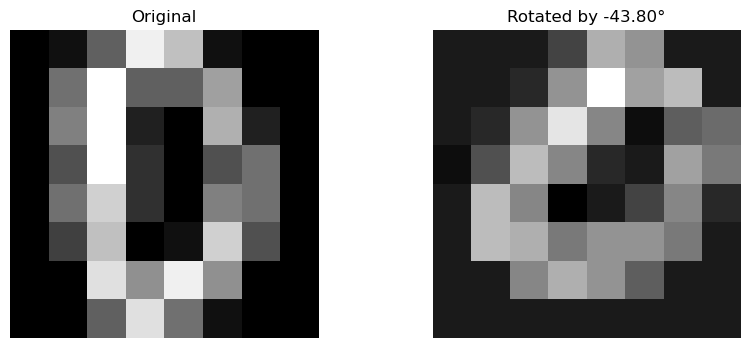

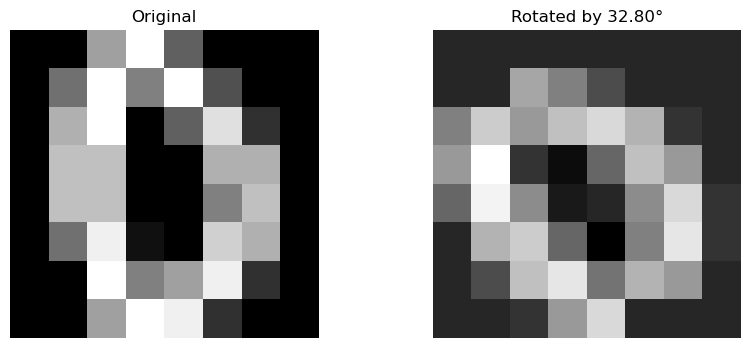

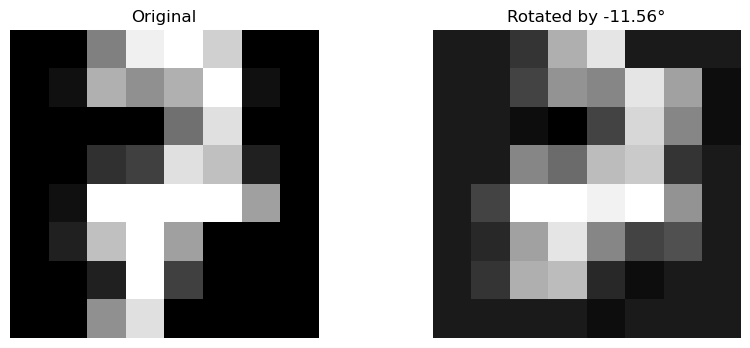

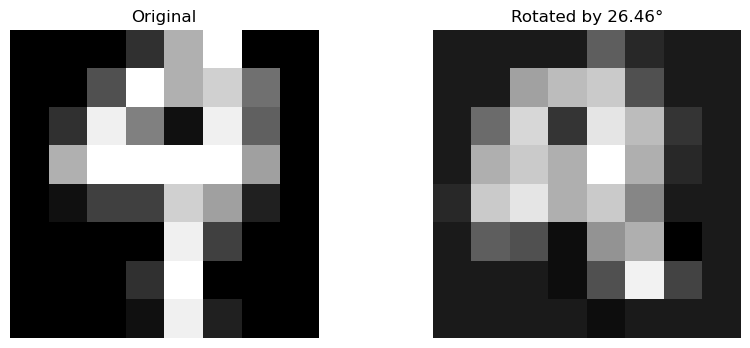

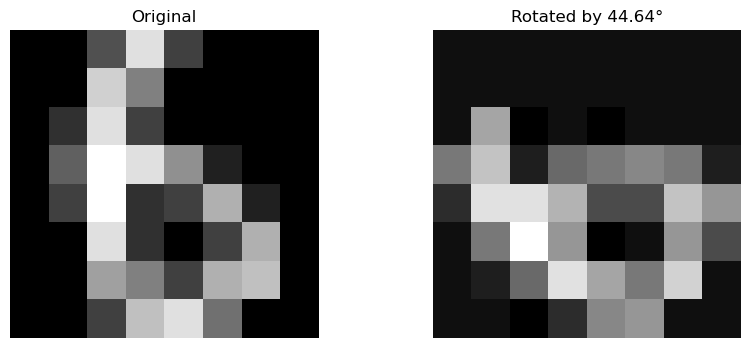

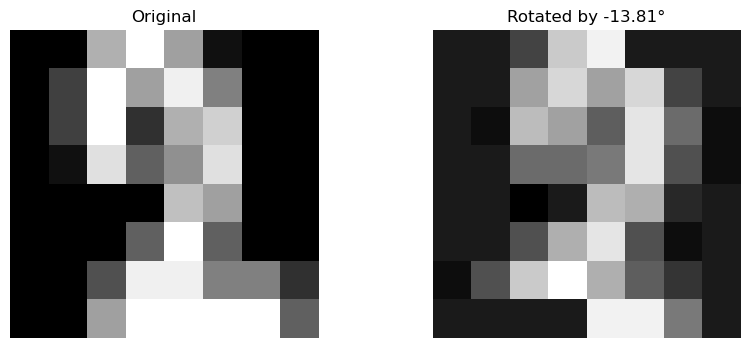

In [55]:
import numpy as np
from scipy.ndimage import affine_transform

def rotate_image(data, angle):

    # Convert angle from degrees to radians
    theta = np.radians(angle)

    # Rotation matrix (for counterclockwise rotation)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta),  np.cos(theta)]
    ])

    # Compute the offset to keep the image centered
    center = np.array(data.shape) / 2
    offset = center - center @ rotation_matrix

    # Use affine_transform to rotate the image
    rotated_data = affine_transform(
        data,
        rotation_matrix.T,  # Transpose for affine_transform
        offset=offset,
        mode='constant',  # Fill empty space with zeros
        cval=0.0          # Value for areas outside the image
    )

    return rotated_data


for index, row in X.iterrows():
    image = row.values.reshape(8, 8)

    random_angle = np.random.uniform(-45, 45)

    rotated_image = rotate_image(image, angle=random_angle)

    # Visualize the first few images (optional)
    if index < 6:  # Visualize only the first 6 images
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.title("Original")
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.title(f"Rotated by {random_angle:.2f}°")
        plt.imshow(rotated_image, cmap='gray')
        plt.axis('off')

        plt.show()

We display some images to visualize how they look after being rotated.


Note that zeros were used when it was required to fill in values. We created a function that rotates the image maintaining the 8x8 size. As we have learnt in our Linear Algebra class a year ago, we can create rotation matrices given an angle $\theta$. If we give them to a the function `affine_transform` from Scipy, we are able to rotate to images.

So when we apply random rotations to the images in the dataset to augment the data. Each rotated image is added to a new array, and the corresponding labels are stored as well. 

In [56]:
def create_rotated_dataset(
    X: pd.DataFrame or np.ndarray, 
    y: pd.DataFrame or np.ndarray, 
    angle=5, 
    numpy_output=True,
    distribution: str = 'uniform'):

    augmented_images = []
    augmented_labels = []

    def iterator(X):
        for index in range(X.shape[0]):
            yield index, X[index]

    if isinstance(X, pd.DataFrame):
        X = np.array(X)
    elif isinstance(X, np.ndarray):
        pass
    else:
        raise TypeError("Only give numpy arrays or pandas dataframes as input")


    # we create a duplicate dataset, rotating each image
    for index, image in iterator(X):
        image = image.reshape(8, 8)

        if distribution == 'uniform':
            random_angle = np.random.uniform(-angle, angle)

        elif distribution == 'bimodal':
            random_angle = np.random.normal(angle, scale=0.1)

            # flip a coin to asign the sign (pun intended)
            coin = np.random.randint(0, 1)
            random_angle = random_angle if coin else -random_angle
        else:
            raise TypeError('The type of distribution should be either `uniform` or `bimodal`')


        # take the absolute value of the transformed image
        rotated_image = np.abs(rotate_image(image, angle=random_angle)).flatten()
        augmented_images.append(rotated_image)

        # handle the labeles
        if isinstance(y, pd.DataFrame):
            augmented_labels.append(y['class'].iloc[index])
        elif isinstance(y, np.ndarray):
            augmented_labels.append(y[index])
        else:
            raise ValueError("y must be numpy array or pandas dataframe")


    X_aug = np.array(augmented_images)
    y_aug = np.array(augmented_labels).reshape(-1, 1)

    if not numpy_output:
        # return as pandas dataframe (just in case)
        Xaugmented = pd.DataFrame(X_aug, columns=[f"attribute_{i}" for i in range(X_aug.shape[1])])
        Yaugmented = pd.DataFrame(y_aug, columns=['label'])
        return Xaugmented, Yaugmented
    
    return X_aug, y_aug

Since we have to rotate many or all image in our dataset, we need to randomize the rotation angle in some way. We developed two distinct probability distributions from which to sample. We will refer to them as "uniform" an "pseudo-bimodal" or "bimodal" more directly.

The uniform distribution is defined as 	$\mathcal {U}_{[-\theta,\theta]}$ for some angle $\theta$. That way we get a random rotation angle between some interval. This angle could either negative or positive, representing counter-clockwise or clockwise rotations respectively. 

The pseudo-bimodal distribution is simply defined as two normal distributions $\mathcal{N}(-\theta, \sigma^2)$ and $\mathcal{N}(\theta, \sigma^2)$. We choose between either sign by "flipping a coin". We represent this distribution as $\pm\mathcal{N}(\theta, \sigma^2)$. In practice we sample from the same normal distribution and then assigning the sign based on a 50%/50% probability.

We use the bimodal distribution to evaluate one angle specifically. For example if we want to rotate all of the images around 45° and -45°. That way we can evaluate the model performance for each interval. Otherwise, to see the performance across all rotations we can sample the degrees from the uniform distribution.

##### Visualize the Rotated Dataset

In [57]:
Xaugmented, Yaugmented = create_rotated_dataset(X_np, y_np, numpy_output=False, distribution='bimodal')

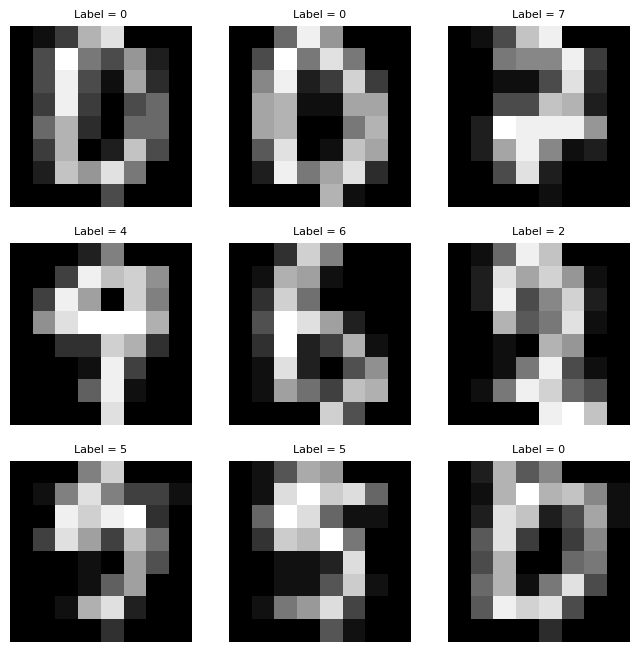

In [58]:
# Create a 3x3 grid to visualize the first 9 images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# Loop through the first 9 images
for index in range(9):
    row = Xaugmented.iloc[index]  # Extract the row data
    image = row.values.reshape(1, -1)
    #image = scaler.inverse_transform(image)
    image = image.reshape(8, 8)  # Reshape to 8x8 for visualization

    ax = axes[index // 3, index % 3]  # Access the grid position
    ax.imshow(image, cmap='gray')  # Plot the image
    ax.set_title(f"Label = {Yaugmented['label'][index]}", fontsize=8)
    ax.axis('off')  # Hide the axes


We only want to tranform the test dataset, just in case.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=.2, random_state=42)

In [60]:
X_aug_test, y_aug_test = create_rotated_dataset(X_test, y_test, angle=5)

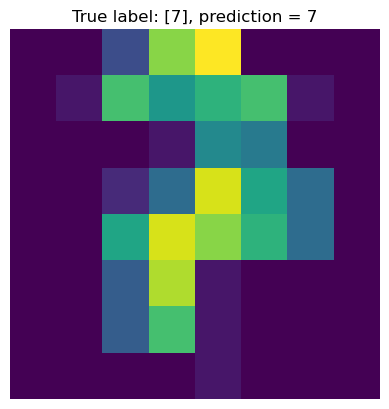

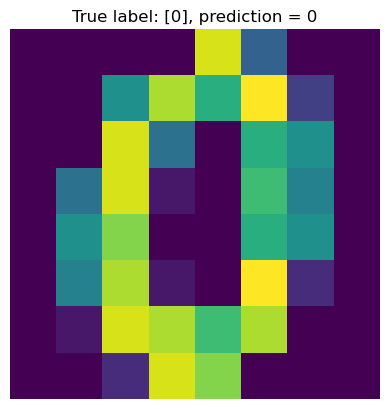

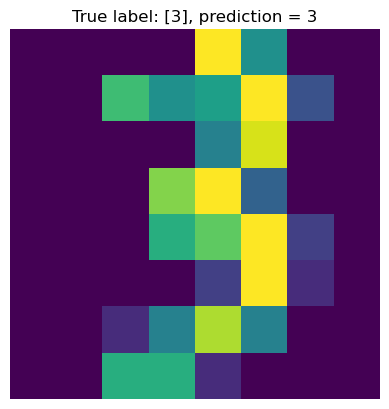

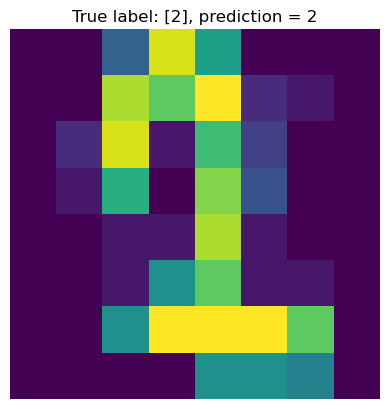

In [61]:
idx_count = 0
for idx in range(X_aug_test.shape[0]):
    image = X_aug_test[idx].reshape(1, -1)
    prediction = grid_search.predict(image).item()

    plt.imshow(image.reshape(8, 8))
    plt.title(f'True label: {y_aug_test[idx]}, prediction = {int(prediction)}')
    plt.axis('off')
    plt.show()
    
    if idx_count == 3:
        break

    idx_count += 1

In [62]:
y_pred_aug = best_svm_model.predict(X_aug_test)

print("Accuracy:", accuracy_score(y_aug_test, y_pred_aug))
print("Classification Report:\n", classification_report(y_aug_test, y_pred_aug))

Accuracy: 0.9759786476868327
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       0.94      1.00      0.97       102
           2       1.00      0.99      1.00       107
           3       1.00      0.92      0.96       118
           4       0.97      1.00      0.98       117
           5       0.98      0.92      0.95        97
           6       1.00      0.99      1.00       123
           7       0.98      0.99      0.99       124
           8       0.97      0.98      0.98       105
           9       0.92      0.96      0.94       123

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



#### See the effect that the rotations have on the validation accuracy
We first test on the whole dataset rotated according to angles sampled from an uniform distribution. That way we can get a general idea on how the model keep performing as more extreme rotations are taken into account. The final accuracy value on the graph would indicate to us how the model performs for all types of rotations between -180° and 180°.

  0%|          | 0/19 [00:00<?, ?it/s]

100%|██████████| 19/19 [00:05<00:00,  3.50it/s]


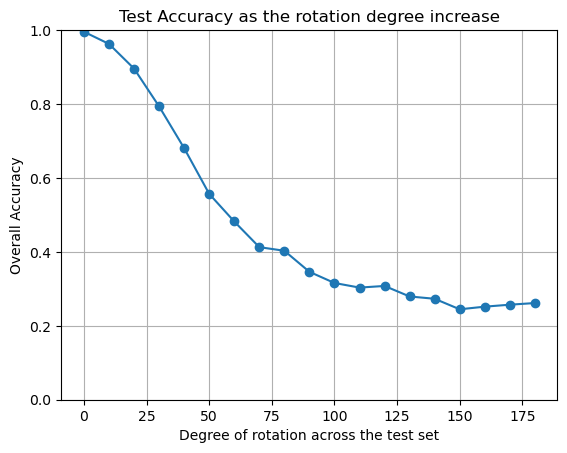

In [63]:
from tqdm import tqdm

# from 0 to 180 degrees of rotation
angles = np.arange(0, 190, 10)

accuracies_uniform = []
for angle in tqdm(angles):
    X_aug_test_iter, y_aug_test_iter = create_rotated_dataset(X_test, y_test, angle=angle, distribution='uniform')
    y_pred_aug_iter = grid_search.predict(X_aug_test_iter)
    accuracies_uniform.append(accuracy_score(y_aug_test_iter, y_pred_aug_iter))

plt.plot(angles, accuracies_uniform, marker='o')
plt.title('Test Accuracy as the rotation degree increase')
plt.ylabel('Overall Accuracy')
plt.xlabel('Degree of rotation across the test set')
plt.ylim((0, 1))
plt.grid()
plt.show()

In [64]:
# Degrees of rotation to evaluate
rotation_angles = [0, 5, 10, 45, 90, 135, 180]

# Dictionary to store metrics for each degree of rotation
metrics_dict = {
    "Angle": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Evaluate on the specified rotation angles
for angle in tqdm(rotation_angles):
    # Create rotated test dataset
    X_aug_test_iter, y_aug_test_iter = create_rotated_dataset(X_test, y_test, angle=angle, distribution='uniform')
    
    # Predict on rotated dataset
    y_pred_aug_iter = grid_search.predict(X_aug_test_iter)
    
    # Compute metrics
    acc = accuracy_score(y_aug_test_iter, y_pred_aug_iter)
    prec = precision_score(y_aug_test_iter, y_pred_aug_iter, average='weighted')
    rec = recall_score(y_aug_test_iter, y_pred_aug_iter, average='weighted')
    f1 = f1_score(y_aug_test_iter, y_pred_aug_iter, average='weighted')
    
    # Append metrics to the dictionary
    metrics_dict["Angle"].append(angle)
    metrics_dict["Accuracy"].append(acc)
    metrics_dict["Precision"].append(prec)
    metrics_dict["Recall"].append(rec)
    metrics_dict["F1-Score"].append(f1)

# Convert dictionary to a pandas DataFrame
metrics_df = pd.DataFrame(metrics_dict)

100%|██████████| 7/7 [00:02<00:00,  3.24it/s]


We want to generate a table that can be included in our report:

In [65]:
# the best piece of code that i have ever seen, no more copying the values manually
latex_table = metrics_df.to_latex(
    index=False,  # Exclude the index
    float_format="%.6f",  # Format floats to 6 decimal places
    caption="Model performance metrics at different rotation angles.",
    label="tab:rotation_metrics"
)

print(latex_table)

\begin{table}
\caption{Model performance metrics at different rotation angles.}
\label{tab:rotation_metrics}
\begin{tabular}{rrrrr}
\toprule
Angle & Accuracy & Precision & Recall & F1-Score \\
\midrule
0 & 0.995552 & 0.995603 & 0.995552 & 0.995546 \\
5 & 0.971530 & 0.972447 & 0.971530 & 0.971588 \\
10 & 0.960854 & 0.962525 & 0.960854 & 0.960776 \\
45 & 0.621886 & 0.743440 & 0.621886 & 0.643899 \\
90 & 0.349644 & 0.682838 & 0.349644 & 0.383301 \\
135 & 0.274021 & 0.652127 & 0.274021 & 0.288474 \\
180 & 0.240214 & 0.546101 & 0.240214 & 0.240786 \\
\bottomrule
\end{tabular}
\end{table}



What is happening here is that as we evalute our original best model with more severe angles, the performance worsens. The angles of the augmented dataset are sampled from an uniform distribution on the interval $[-\theta, \theta]$. We believe that the flattening of the curve once it pases 90/100 degrees is due to this type of sampling.

In order to verify this (sort of) we can sample from a pseudo-bimodal ditribution that we make ourselves. We take two normal distributions with mean $-\theta$ and $\theta$. Basically we just sample from the normal distribution centered at $\theta$ and then we flip a coin to determine the sign of the angle sampled.

100%|██████████| 19/19 [00:04<00:00,  4.34it/s]


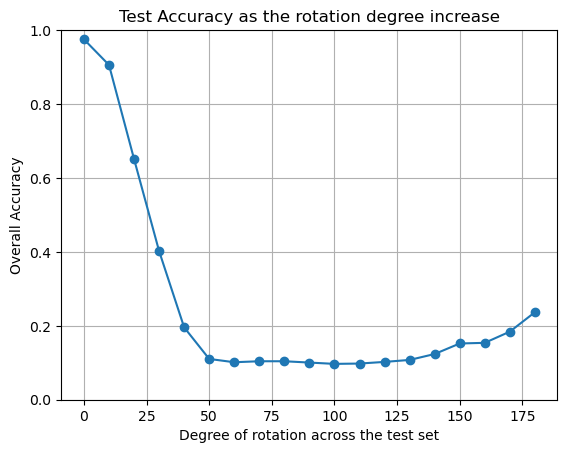

In [66]:
from tqdm import tqdm

# from 0 to 180 degrees of rotation
angles = np.arange(0, 190, 10)

accuracies_bimodal = []
for angle in tqdm(angles):
    X_aug_test_iter, y_aug_test_iter = create_rotated_dataset(X_test, y_test, angle=angle, distribution='bimodal')
    y_pred_aug_iter = grid_search.predict(X_aug_test_iter)
    accuracies_bimodal.append(accuracy_score(y_aug_test_iter, y_pred_aug_iter))

plt.plot(angles, accuracies_bimodal, marker='o')
plt.title('Test Accuracy as the rotation degree increase')
plt.ylabel('Overall Accuracy')
plt.xlabel('Degree of rotation across the test set')
plt.ylim((0, 1))
plt.grid()
plt.show()

This result is much interesting. There is a steep and clear decline as soon as we increase the angle. Moreover, we can see how the model's performance increases sligtly as the rotations get more horitzontal. We do not have a clear idea on why this is the case. 

Combining both plots for the presentation and the report:

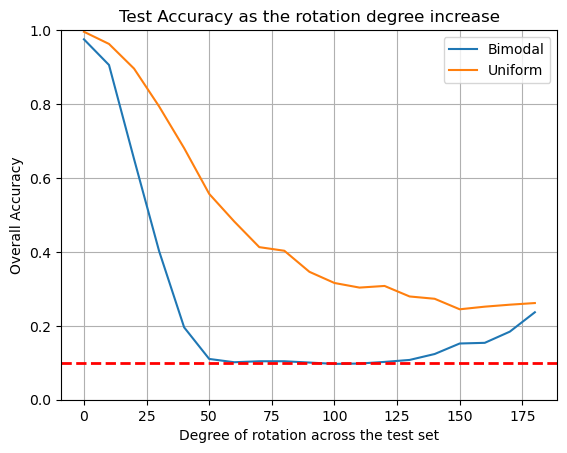

In [67]:

plt.plot(angles, accuracies_bimodal, label='Bimodal')
plt.plot(angles, accuracies_uniform, label='Uniform')
plt.title('Test Accuracy as the rotation degree increase')
plt.ylabel('Overall Accuracy')
plt.xlabel('Degree of rotation across the test set')
plt.ylim((0, 1))
plt.legend()
plt.axhline(y=0.10, color='red', linestyle='--', linewidth=2, label='Random label')
plt.grid()
plt.show()

On the plot we can observe that a model trained on uniform rotations always performs better than on bimodal. To us, the explanation for this is that on the test set there are still many images that are rotated by a degree close to zero. Therefore, we could consider that testing on an uniform distribution of angles has always a bias towards reporting better results.

#### Creating a new model for each rotation angle

First we want to test if we can create a new model for each type rotation level. For this we recreate the entire dataset rotate all image AROUND one degree. Using the same pseudo-bimodal distribution used earlier.

We expect the models to fit and have a performance on par with our original model. Since we are just going basically the same, just with a 'rotation across all the feature space'.

In [68]:
from numpy import random

angles = np.arange(0, 190, 10)
accuracies_new_models = []

for angle in angles: 
    X_aug, y_aug = create_rotated_dataset(X, y, angle=angle, distribution='bimodal')
    X_aug_train, X_aug_test, y_aug_train, y_aug_test = train_test_split(X_aug, y_aug.ravel(), test_size=0.2, random_state=42, shuffle=True)

    svm_model_aug = SVC(kernel='rbf', random_state=42)
    svm_model_aug.fit(X_aug_train, y_aug_train)

    y_pred_aug = svm_model_aug.predict(X_aug_test)

    accuracy = accuracy_score(y_aug_test, y_pred_aug)
    accuracies_new_models.append(accuracy)
    print(f"Accuracy for angle {angle}:", accuracy_score(y_aug_test, y_pred_aug))

Accuracy for angle 0: 0.9848754448398577
Accuracy for angle 10: 0.9830960854092526
Accuracy for angle 20: 0.9857651245551602
Accuracy for angle 30: 0.9830960854092526
Accuracy for angle 40: 0.9822064056939501
Accuracy for angle 50: 0.9848754448398577
Accuracy for angle 60: 0.9857651245551602
Accuracy for angle 70: 0.9822064056939501
Accuracy for angle 80: 0.9813167259786477
Accuracy for angle 90: 0.9822064056939501
Accuracy for angle 100: 0.9822064056939501
Accuracy for angle 110: 0.9822064056939501
Accuracy for angle 120: 0.9795373665480427
Accuracy for angle 130: 0.9786476868327402
Accuracy for angle 140: 0.9848754448398577
Accuracy for angle 150: 0.9822064056939501
Accuracy for angle 160: 0.9839857651245552
Accuracy for angle 170: 0.9822064056939501
Accuracy for angle 180: 0.9822064056939501


We cannot see any clear decrease in the test accuracy for each dataset as we increase the degree of rotation across the data. However, there are some differences that we could attribute to noise.

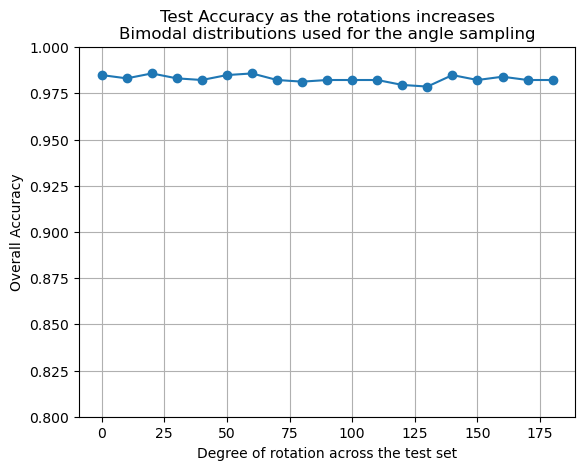

In [69]:
plt.plot(angles, accuracies_new_models, marker='o', label='Models on bimodal rotations')
plt.title('Test Accuracy as the rotations increases\nBimodal distributions used for the angle sampling')
plt.ylabel('Overall Accuracy')
plt.xlabel('Degree of rotation across the test set')
plt.ylim((.8, 1))
plt.grid()
plt.show()

However, what happens if we try the rotations from 0° upto some degree $\theta$. This would of course increase the variation on the data. As an example, in one dataset we could get a image rotated by -15° and another to 92°. This time we could expect that the model delivers a worse overall accuracy as we increase the maximum rotation that happens on the dataset:

In [70]:
angles = np.arange(0, 190, 10)

accuracies_new_models = []
for angle in angles: 
    X_aug, y_aug = create_rotated_dataset(X, y, angle=angle, distribution='uniform')
    X_aug_train, X_aug_test, y_aug_train, y_aug_test = train_test_split(X_aug, y_aug.ravel(), test_size=0.2, random_state=42, shuffle=True)

    svm_model_aug = SVC(kernel='rbf', random_state=42)
    svm_model_aug.fit(X_aug_train, y_aug_train)

    y_pred_aug = svm_model_aug.predict(X_aug_test)

    accuracy = accuracy_score(y_aug_test, y_pred_aug)
    accuracies_new_models.append(accuracy)
    print(f"Accuracy for angle {angle}:", accuracy_score(y_aug_test, y_pred_aug))

Accuracy for angle 0: 0.9902135231316725
Accuracy for angle 10: 0.9795373665480427
Accuracy for angle 20: 0.9733096085409253
Accuracy for angle 30: 0.9644128113879004
Accuracy for angle 40: 0.9661921708185054
Accuracy for angle 50: 0.9653024911032029
Accuracy for angle 60: 0.958185053380783
Accuracy for angle 70: 0.9555160142348754
Accuracy for angle 80: 0.9564056939501779
Accuracy for angle 90: 0.949288256227758
Accuracy for angle 100: 0.9448398576512456
Accuracy for angle 110: 0.9332740213523132
Accuracy for angle 120: 0.9483985765124555
Accuracy for angle 130: 0.9252669039145908
Accuracy for angle 140: 0.9412811387900356
Accuracy for angle 150: 0.9270462633451957
Accuracy for angle 160: 0.9225978647686833
Accuracy for angle 170: 0.9137010676156584
Accuracy for angle 180: 0.9199288256227758


In this case we can see a decrease of the test accuracy as the degree is increased.

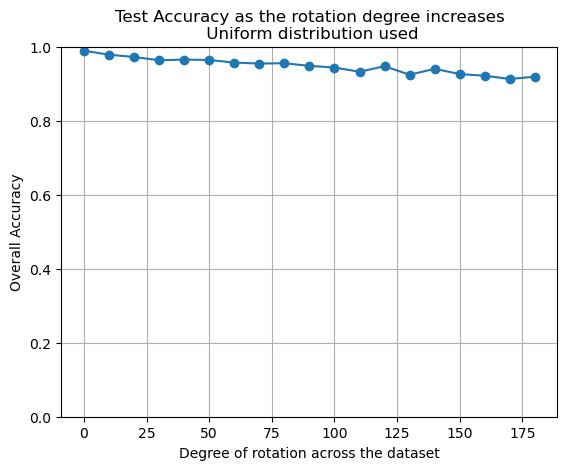

In [71]:
plt.plot(angles, accuracies_new_models, marker='o')
plt.title('Test Accuracy as the rotation degree increases\n Uniform distribution used')
plt.ylabel('Overall Accuracy')
plt.xlabel('Degree of rotation across the dataset')
plt.ylim((0, 1))
plt.grid()
plt.show()

This decrease is due to the fact that the model is trying to generalize over more data. As there is more diversity of image on the dataset because of the uniform sampling in the interval $[-\theta, \theta]$, the model tries to solve a problem that is becoming more difficult. In other words, we are trying to train the model over a dataset that contains a larger feature space.

##### Combining both models (training on the different type of rotations)

To recap, what we have is:
- A much of models trained with just rotated images from a normal distribution centered at $\theta$.
- A general model that is trained with all possible rotation angle sampled from an uniform distribution sampled from $[-\theta, \theta]$.

Now, assuming that we can detect the rotation of a number that is given to our model, which option could be better?
- For each angle given take the model trained on the normal distribution that is closest to the angle.
- Just pass the image to the generalized model trained on rotations from $[-180, 180]$.

We came up with a scheme that could give us an idea about if the first option is better than the second one:
1. Create a small test set with rotations sampled from $\pm\mathcal{N}(\theta, \sigma^{2})$, for each $\theta$.
2. For each model trained on $\pm\mathcal {N}(\theta ,\sigma ^{2})$. Evaluate on each of these datasets.
3. Take the more general model trained on images rotated from $[-180, 180]$ and do the same.
4. Compare both of them, the key idea is to see which as the maximum at each given angle.

In [72]:
angles = np.arange(0, 190, 10)

X_leftover, X_test, y_leftover, y_test = train_test_split(X_np, y_np, test_size=.2)

# we can use the same images and rotate them each time (much simpler this way)
test_datasets = []
for angle in angles:
    X_test_rotated, y_test = create_rotated_dataset(X_test, y_test, distribution='bimodal', angle=angle)
    test_datasets.append(X_test_rotated)

print(f'We have a total of {len(test_datasets)} rotation test datasets')
print(f'Each one has {test_datasets[0].shape[0]} images')

We have a total of 19 rotation test datasets
Each one has 1124 images


100%|██████████| 19/19 [00:06<00:00,  2.77it/s]

Mean Test Accuracy on all dataset = 0.9316351376662296


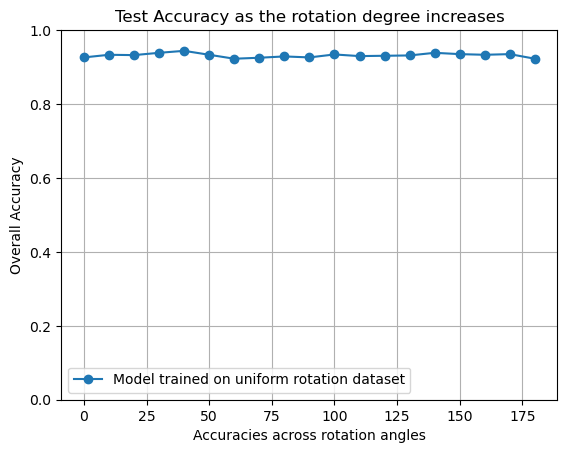

In [73]:
accuracies = []
ANGLE = 180

X_aug, y_aug = create_rotated_dataset(X_leftover, y_leftover.ravel(), angle=ANGLE, distribution='uniform')
svm_model_aug = SVC(kernel='rbf', random_state=42)
svm_model_aug.fit(X_aug, y_aug.ravel())

accuracies_across_rotations = []
for X_test_angle in tqdm(test_datasets):
    y_pred_aug = svm_model_aug.predict(X_test_angle)
    accuracy = accuracy_score(y_test, y_pred_aug)
    accuracies_across_rotations.append(accuracy)

print(f'Mean Test Accuracy on all dataset = {np.mean(accuracies_across_rotations)}')

plt.plot(angles, accuracies_across_rotations, marker='o', label='Model trained on uniform rotation dataset')
#plt.axhline(y=0.90, color='red', linestyle='--', linewidth=2, label='y = 0.90')

plt.title('Test Accuracy as the rotation degree increases')
plt.ylabel('Overall Accuracy')
plt.xlabel('Accuracies across rotation angles')
plt.ylim((0, 1))
plt.grid()
plt.legend()
plt.show()

Basically we do not observe any significat variation across the different angles. The mean between all of them is ~94%.

Know we create a new model for each angle and see their combined performance.

In [74]:
angles = np.arange(0, 190, 10)

overall_accuracies = {}
for angle in tqdm(angles):
    X_train, y_train = create_rotated_dataset(X_leftover, y_leftover, angle=angle, distribution='bimodal')

    svm_model_aug = SVC(kernel='rbf', random_state=42)
    svm_model_aug.fit(X_train, y_train.ravel())

    accuracies_bimodal_model = []
    for X_test in test_datasets:
        y_pred_aug = svm_model_aug.predict(X_test)

        accuracy = accuracy_score(y_test.ravel(), y_pred_aug)
        accuracies_bimodal_model.append(accuracy)
    overall_accuracies[str(angle)] = accuracies_bimodal_model

100%|██████████| 19/19 [00:53<00:00,  2.84s/it]


/tmp/nix-shell.XbWhBj/ipykernel_186610/113503952.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap('plasma', len(overall_accuracies))


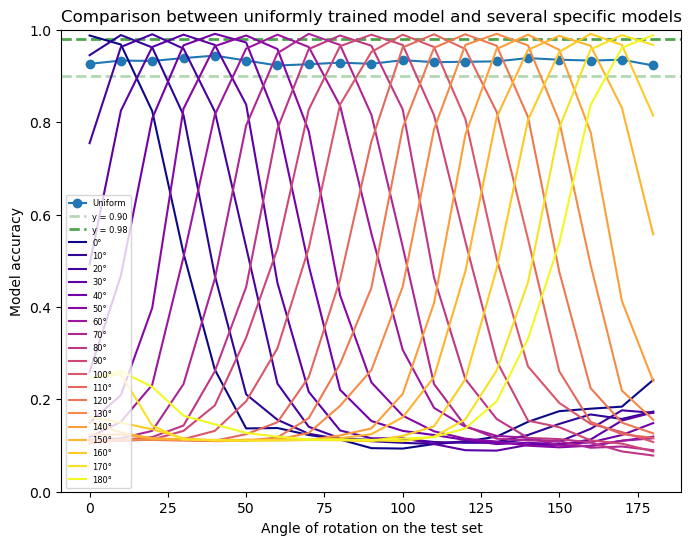

In [75]:
import matplotlib.cm as cm
colormap = cm.get_cmap('plasma', len(overall_accuracies))

fig, axes = plt.subplots(1, 1, figsize=(8, 6))

plt.plot(angles, accuracies_across_rotations, marker='o', label='Uniform')
plt.axhline(y=0.90, color='green', linestyle='--', linewidth=2, label='y = 0.90', alpha=.3)
plt.axhline(y=0.98, color='green', linestyle='--', linewidth=2, label='y = 0.98', alpha=.7)

for idx, (angle, accuracy_plot) in enumerate(overall_accuracies.items()):
    axes.plot(angles, accuracy_plot, label=str(angle) + '°', color=colormap(idx))

plt.ylim(0, 1)
plt.title('Comparison between uniformly trained model and several specific models')
plt.legend(loc=3, prop={'size': 6})
plt.ylabel('Model accuracy')
plt.xlabel('Angle of rotation on the test set')
plt.show()

The accuracy of the models trained on a very specific range of angles always performs better than the more general model. That is, for each image with an angle $\theta$, there is at least one model trained on image rotated closely to $\theta$ that performs better than the uniform one.

Of course, we need to mention that this is practice would not make that much sense. If you know the rotation of a given image, then we could just rotate the image back to resemble the original image. However, we wanted to represent this result since its still interesting.

#### Creating a Model with Augmented and Original Data

We can take a third of the dataset and rotate it, then insert this image back into the dataset, that way increasing the number of image instances. That way hopefully we can create a model that generalizes better.

With this models we can again try to see the limits.

In [76]:
import numpy as np
import pandas as pd
from scipy.ndimage import rotate

# Helper function to rotate an image
def rotate_image(image, angle):
    return rotate(image, angle, reshape=False)

def augment_and_expand_dataset(X, y, angle=20, fraction=.3, distribution='uniform'):
    """
    Augments a fraction of the dataset by rotating images and reinserts them into the dataset.
    """
    # Convert to DataFrame/Series if input is ndarray
    X = pd.DataFrame(X) if isinstance(X, np.ndarray) else X
    y = pd.Series(y) if isinstance(y, np.ndarray) else y

    # Determine the number of samples to augment
    num_to_augment = X.shape[0] // 3

    # Sample indices to augment
    indices_to_augment = np.random.choice(X.index, size=num_to_augment, replace=False)

    augmented_images = []
    augmented_labels = []


    # Augment the sampled images
    for idx in indices_to_augment:
        image = X.loc[idx].values.reshape(8, 8)  # Reshape to 8x8 image

        if distribution == 'uniform':
            random_angle = np.random.uniform(-angle, angle)

        elif distribution == 'bimodal':
            random_angle = np.random.normal(angle, scale=0.1)

            # flip a coin to asign the sign (pun intended)
            coin = np.random.randint(0, 1)
            random_angle = random_angle if coin else -random_angle
        else:
            raise TypeError('The type of distribution should be either `uniform` or `bimodal`')

        rotated_image = rotate_image(image, random_angle)  # Rotate the image
        rotated_image = rotated_image.flatten()  # Flatten back to 1D
        
        augmented_images.append(rotated_image)
        augmented_labels.append(y.loc[idx])  # Keep the same label

    # Convert augmented images and labels to numpy arrays
    X_aug = np.array(augmented_images)
    y_aug = np.array(augmented_labels)

    # Combine the original and augmented datasets
    X_comb = np.concatenate((X.values, X_aug), axis=0)  # Combine along axis 0
    y_comb = np.concatenate((y.values, y_aug), axis=0)

    return X_comb, y_comb

##### Model trained on expanded dataset with rotations

The remaining approach would be to add new images to the dataset and check if we increase the accuracy of the model trained on all angles at the same time:

In [77]:
# sparate the original dataset into two parts
X_augmented, X_leftover, y_augmented, y_leftover = train_test_split(X_np, y_np, test_size=.1, random_state=42)

# expand the largest part by images rotated by 45 degrees
X_augmented, y_augmented = augment_and_expand_dataset(X_augmented, y_augmented.ravel(), angle=180, distribution='uniform')

print(f"Original dataset size: {X.shape[0]}")
print(f"Augmented dataset size: {X_augmented.shape[0]}")
print(f"Original label size: {y.shape[0]}")
print(f"Augmented label size: {y_augmented.shape[0]}")

svm_180 = SVC(kernel='rbf', random_state=42)
svm_180.fit(X_augmented, y_augmented.ravel())

Original dataset size: 5620
Augmented dataset size: 6744
Original label size: 5620
Augmented label size: 6744


SVC(random_state=42)

100%|██████████| 19/19 [00:04<00:00,  4.38it/s]


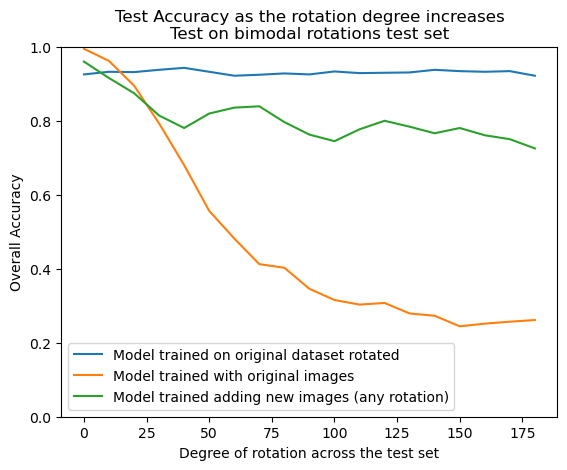

In [78]:
from tqdm import tqdm

# from 0 to 180 degrees of rotation
angles = np.arange(0, 190, 10)

accuracies_bimodal_angle = []
accuracies_uniform_model = []
for angle in tqdm(angles):
    X_aug_test_iter, y_aug_test_iter = create_rotated_dataset(X_leftover, y_leftover, angle=angle, distribution='bimodal')
    y_pred_aug_iter = svm_180.predict(X_aug_test_iter)
    accuracies_bimodal_angle.append(accuracy_score(y_aug_test_iter, y_pred_aug_iter))

plt.plot(angles, accuracies_across_rotations, label='Model trained on original dataset rotated')
plt.plot(angles, accuracies_uniform, label='Model trained with original images')
plt.plot(angles, accuracies_bimodal_angle, label='Model trained adding new images (any rotation)')
plt.title('Test Accuracy as the rotation degree increases\nTest on bimodal rotations test set')
plt.ylabel('Overall Accuracy')
plt.xlabel('Degree of rotation across the test set')
plt.ylim((0, 1))
plt.legend()
plt.show()

Training the model on an expanded dataset significalty improve the accuracy over the model trained on the original image. However is does not surpass the model trained previously, were all of the images in the dataset were rotated using angles sampled from an uniform distribution. Both dataset were constructed using rotations from the range -180° to 180°.

# Selecting and Training the Ensemble Model

## Voting Classifier

The VotingClassifier is an ensemble method that combines predictions from multiple classifiers. In this project, we used hard voting, which predicts the class that receives the majority vote from the base classifiers.

In [79]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

clf_logreg = LogisticRegression()
clf_nb = GaussianNB()
clf_tree = DecisionTreeClassifier(random_state=42)
clf_svc = SVC()

clf_voting_hard = VotingClassifier(
    estimators=[('lr', clf_logreg), ('nb', clf_nb), ('dt', clf_tree), ('svc', clf_svc)],
    voting='hard')

clf_voting_hard.fit(X_train, y_train)

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

VotingClassifier(estimators=[('lr', LogisticRegression()), ('nb', GaussianNB()),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svc', SVC())])

In [80]:
def compare_classifiers_accuracies(clfs: list[object], X_train, X_test, y_train, y_test):
    """Fit each classifier and compare their accuracies."""
    for clf in clfs:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"{clf.__class__.__name__}:", accuracy_score(y_test, y_pred))

In [81]:
compare_classifiers_accuracies([clf_logreg, clf_nb, clf_tree, clf_svc, clf_voting_hard], X_train, X_test, y_train, y_test)

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A colu

LogisticRegression: 0.9599644128113879
GaussianNB: 0.8460854092526691
DecisionTreeClassifier: 0.9163701067615658
SVC: 0.9884341637010676


/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

VotingClassifier: 0.9768683274021353


The high performance of SVC and Logistic Regression indicates the MNIST dataset is relatively easy to classify with proper models. However, the dataset's non-linear characteristics (evidenced by SVC's superior performance) suggest the need for more advanced methods, such as CNNs or ensembles, to achieve state-of-the-art results.

I seems that the Gaussian Naive Bayes is the worst model between the four. The decision tree classifier is somewhat comparable to the SVM and Logistic Regression, however the last two are clearly better, with the SVM being on top.

Trying to remove the Naive Bayes from the voting classifier:

In [82]:
clf_voting_hard_wiout_NB = VotingClassifier(
    estimators=[('lr', clf_logreg), ('dt', clf_tree), ('svc', clf_svc)],
    voting='hard')

clf_voting_hard_wiout_NB.fit(X_train, y_train)
y_pred = clf_voting_hard_wiout_NB.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       103
           1       0.98      0.97      0.97       117
           2       0.97      1.00      0.99       104
           3       0.99      0.99      0.99       117
           4       0.98      0.98      0.98       126
           5       0.97      0.95      0.96       104
           6       0.97      0.98      0.98       105
           7       0.99      1.00      1.00       123
           8       0.98      0.97      0.98       119
           9       0.97      0.97      0.97       106

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



In [83]:
clf_voting_hard_logistic_svm = VotingClassifier(
    estimators=[('lr', clf_logreg), ('svc', clf_svc)],
    voting='hard')

clf_voting_hard_logistic_svm.fit(X_train, y_train)
y_pred = clf_voting_hard_logistic_svm.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.htm

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       103
           1       0.95      0.99      0.97       117
           2       0.96      0.99      0.98       104
           3       0.96      0.98      0.97       117
           4       0.96      0.98      0.97       126
           5       0.98      0.91      0.95       104
           6       0.98      0.99      0.99       105
           7       1.00      1.00      1.00       123
           8       0.99      0.96      0.97       119
           9       0.98      0.95      0.97       106

    accuracy                           0.98      1124
   macro avg       0.98      0.98      0.98      1124
weighted avg       0.98      0.98      0.98      1124



The hard voting classifier combining Logistic Regression and SVM achieves an accuracy of 97.86%, indicating that integrating both models effectively leverages their strengths. This performance demonstrates the ensemble's ability to generalize well by combining linear and non-linear classification capabilities.

## Bagging Classifier


Bagging, or Bootstrap Aggregating, is another ensemble technique that enhances model stability and generalization by training multiple models on different subsets of the training data created through sampling with replacement.

In [84]:
from sklearn.ensemble import BaggingClassifier

clf_bagging = BaggingClassifier(
    estimator=SVC(),
    n_estimators=100,
    max_samples=int(len(X_train)*0.50),
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=42
)

clf_bagging.fit(X_train, y_train)


/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/ensemble/_bagging.py:888: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=SVC(), max_samples=2248, n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

In [85]:
accuracy_score(y_test, clf_bagging.predict(X_test))

0.9884341637010676

In [86]:
svm = SVC()
svm.fit(X_train, y_train)

accuracy_score(y_test, svm.predict(X_test))

/home/tomiock/uni2024/machine_learning/digits/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9884341637010676

Achieving an accuracy of 98.93% highlights the following:

High Performance: The ensemble successfully leverages the robustness of the SVC and the variance reduction provided by bagging to improve generalization.

Sampling Efficiency: Using 50% of the training data in each iteration shows that bagging works effectively even with subsets, avoiding overfitting and maintaining strong performance.

Out-of-Bag Score Validation: The inclusion of oob_score=True allows for additional model validation without relying solely on the test set, ensuring the model is well-calibrated.

This setup demonstrates the synergy of combining strong base learners like SVC with bagging techniques to enhance accuracy on challenging datasets like MNIST.